In [1]:
!pip install scikit-learn


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install pandas



[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
!pip install gensim


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
!pip install pyLDAvis


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
!pip install wordcloud 


[notice] A new release of pip available: 22.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import os

# Set the path to your dataset
dataset_path = r'E:\CSharpDataset'

def collect_text_files(directory):
    file_paths = []
    max_files = 10000
    target_md_ratio = 0.075
    target_yml_ratio = 0.075
    target_json_ratio = 0.075
    
    md_count = 0
    yml_count = 0
    json_count = 0
    
    for root, dirs, files in os.walk(directory):
        for file_name in files:
            file_path = os.path.join(root, file_name)
            if file_path.endswith('.md'):  
                if md_count / (len(file_paths) + 1) > target_md_ratio:
                    continue  # Skip this .md file
                md_count += 1
                file_paths.append(file_path)
            elif file_path.endswith('.yml'):  
                if yml_count / (len(file_paths) + 1) > target_yml_ratio:
                    continue  # Skip this .md file
                yml_count += 1
                file_paths.append(file_path)
            elif file_path.endswith('.json'):  
                if json_count / (len(file_paths) + 1) > target_json_ratio:
                    continue 
                json_count += 1
                file_paths.append(file_path)
            else:
                file_paths.append(file_path)  


            if len(file_paths) >= max_files:
                return file_paths 

    return file_paths

file_paths = collect_text_files(dataset_path)

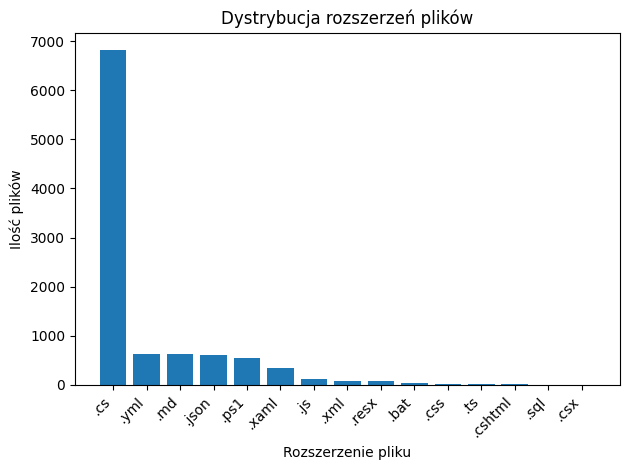

In [9]:
import matplotlib.pyplot as plt

from collections import defaultdict

def get_file_extension(file_path):
    _, extension = os.path.splitext(file_path)
    return extension.lower()
    
extension_counts = defaultdict(int)

for file_path in file_paths:
    extension = get_file_extension(file_path)
    extension_counts[extension] += 1

# Sort extensions for cleaner presentation 
sorted_extensions = sorted(extension_counts.items(), key=lambda item: item[1], reverse=True)

extensions, counts = zip(*sorted_extensions)

plt.bar(extensions, counts)
plt.xlabel('Rozszerzenie pliku')
plt.ylabel('Ilość plików')
plt.title('Dystrybucja rozszerzeń plików')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

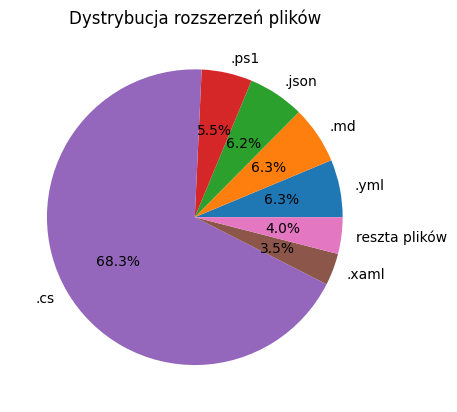

In [10]:
threshold = 2.0  # Group extensions below this percentage into 'Rest' 

# Create 'Rest' category and calculate percentages
others_count = 0
total_files = sum(extension_counts.values())

data = []
labels = []

for extension, count in extension_counts.items():
    percentage = (count / total_files) * 100
    if percentage >= threshold:
        data.append(percentage)
        labels.append(extension)
    else:
        others_count += count 

data.append((others_count / total_files) * 100)
labels.append('reszta plików')  # Use 'Rest' as the label

# Create the pie chart
plt.pie(data, labels=labels, autopct="%1.1f%%")
plt.title('Dystrybucja rozszerzeń plików')
plt.show()

In [11]:
import logging
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models import CoherenceModel

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


tfidf_vectorizer = TfidfVectorizer(input='filename', encoding='ISO-8859-1', max_df=0.9, min_df=0.1)
try:
    tfidf_matrix = tfidf_vectorizer.fit_transform(file_paths)
except Exception as e:
    logger.error(f"Error creating TF-IDF matrix: {e}")

# Convert the TF-IDF matrix to a DataFrame for easier interpretation
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print(tfidf_df)

C:\Users\dev422\AppData\Local\Temp\ipykernel_18656\1466351533.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


           add      all        an       and       any       are        as  \
0     0.000000  0.00000  0.000000  0.148965  0.000000  0.000000  0.000000   
1     0.000000  0.00000  0.156550  0.223735  0.170396  0.000000  0.150071   
2     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.274509  0.02964  0.012118  0.000000  0.158283  0.026661  0.011617   
...        ...      ...       ...       ...       ...       ...       ...   
9995  0.000000  0.00000  0.000000  0.030194  0.013140  0.019921  0.000000   
9996  0.000000  0.00000  0.000000  0.030966  0.013477  0.020430  0.000000   
9997  0.000000  0.00000  0.023516  0.025207  0.006399  0.032336  0.005636   
9998  0.000000  0.00000  0.000000  0.036715  0.015978  0.024223  0.000000   
9999  0.000000  0.00000  0.000000  0.020744  0.009028  0.013686  0.000000   

            at      base        be  ...   we  which      will   windows  \


In [12]:
# Print the top most important terms for each document
top_terms_count = 10

for i, row in enumerate(tfidf_df.iterrows()):
    doc_index, doc_tfidf = row
    top_terms = doc_tfidf.sort_values(ascending=False).head(top_terms_count)
    print(f"\nNajważniejsze {top_terms_count} terminów dla dokumentu {i + 1}:")
    print(top_terms)


Najważniejsze 10 terminów dla dokumentu 1:
value       0.639592
name        0.556493
build       0.351802
internal    0.224039
and         0.148965
default     0.119572
https       0.102451
or          0.096271
com         0.093352
version     0.092793
Name: 0, dtype: float64

Najważniejsze 10 terminów dla dokumentu 2:
license     0.612073
on          0.322970
under       0.307584
the         0.289042
and         0.223735
for         0.196000
licensed    0.174429
any         0.170396
an          0.156550
https       0.153875
Name: 1, dtype: float64

Najważniejsze 10 terminów dla dokumentu 3:
version       1.0
add           0.0
return        0.0
protected     0.0
public        0.0
readonly      0.0
reciprocal    0.0
reserved      0.0
returns       0.0
private       0.0
Name: 2, dtype: float64

Najważniejsze 10 terminów dla dokumentu 4:
com           0.720033
build         0.542694
write         0.400185
param         0.163976
returns       0.000000
public        0.000000
readonly      

In [13]:
top_global_terms = tfidf_df.mean().sort_values(ascending=False).head(top_terms_count)
print("\nNajważniejsze globalne terminy we wszystkich dokumentach:")
print(top_global_terms)


Najważniejsze globalne terminy we wszystkich dokumentach:
public     0.126758
the        0.114412
new        0.089778
using      0.087504
this       0.086835
string     0.078454
summary    0.077159
if         0.074392
return     0.072559
name       0.071683
dtype: float64


In [14]:
# Calculate cosine similarity between documents
# this probably cant be done on all documents
similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Print the similarity between the first few documents
for i in range(5):
    for j in range(i + 1, i + 6):
        print(f"\nPodobieństwo między dokumentem {i + 1}, a dokumentem {j + 1}: {similarity_matrix[i, j]}")


Podobieństwo między dokumentem 1, a dokumentem 2: 0.10946791271803366

Podobieństwo między dokumentem 1, a dokumentem 3: 0.09279290680575629

Podobieństwo między dokumentem 1, a dokumentem 4: 0.25813738531062197

Podobieństwo między dokumentem 1, a dokumentem 5: 0.15056929975123653

Podobieństwo między dokumentem 1, a dokumentem 6: 0.0975691242574399

Podobieństwo między dokumentem 2, a dokumentem 3: 0.0

Podobieństwo między dokumentem 2, a dokumentem 4: 0.10095531748471406

Podobieństwo między dokumentem 2, a dokumentem 5: 0.090382281063079

Podobieństwo między dokumentem 2, a dokumentem 6: 0.08405740724535424

Podobieństwo między dokumentem 2, a dokumentem 7: 0.009681062685679698

Podobieństwo między dokumentem 3, a dokumentem 4: 0.0

Podobieństwo między dokumentem 3, a dokumentem 5: 0.49626953071844915

Podobieństwo między dokumentem 3, a dokumentem 6: 0.0

Podobieństwo między dokumentem 3, a dokumentem 7: 0.502415377769723

Podobieństwo między dokumentem 3, a dokumentem 8: 0.0

Po

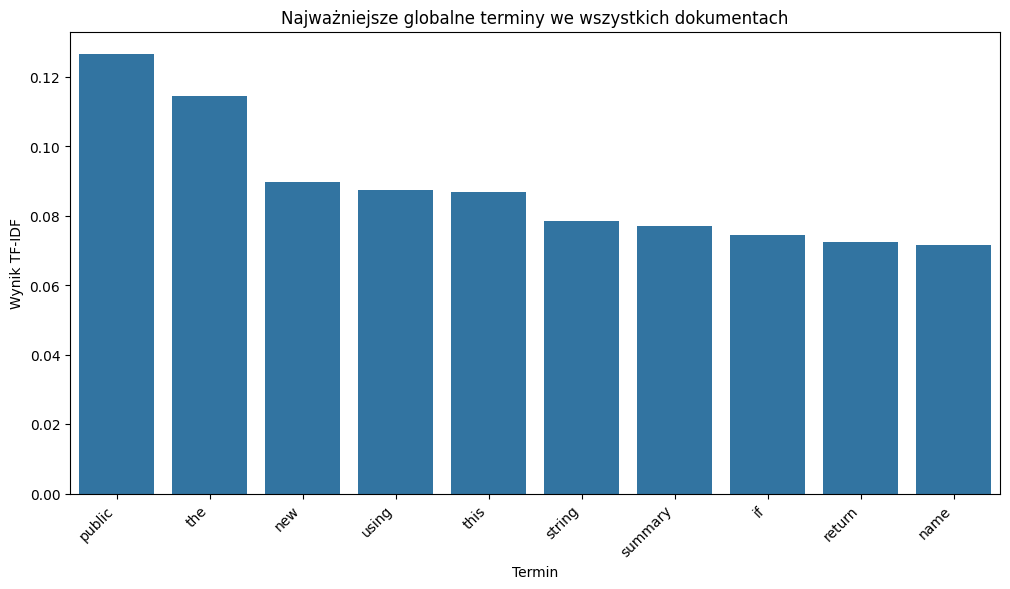

In [15]:
# Plot a bar chart of the top terms across all documents
plt.figure(figsize=(12, 6))
sns.barplot(x=top_global_terms.index, y=top_global_terms.values)
plt.title('Najważniejsze globalne terminy we wszystkich dokumentach')
plt.xlabel('Termin')
plt.ylabel('Wynik TF-IDF')
plt.xticks(rotation=45, ha='right')
plt.show()

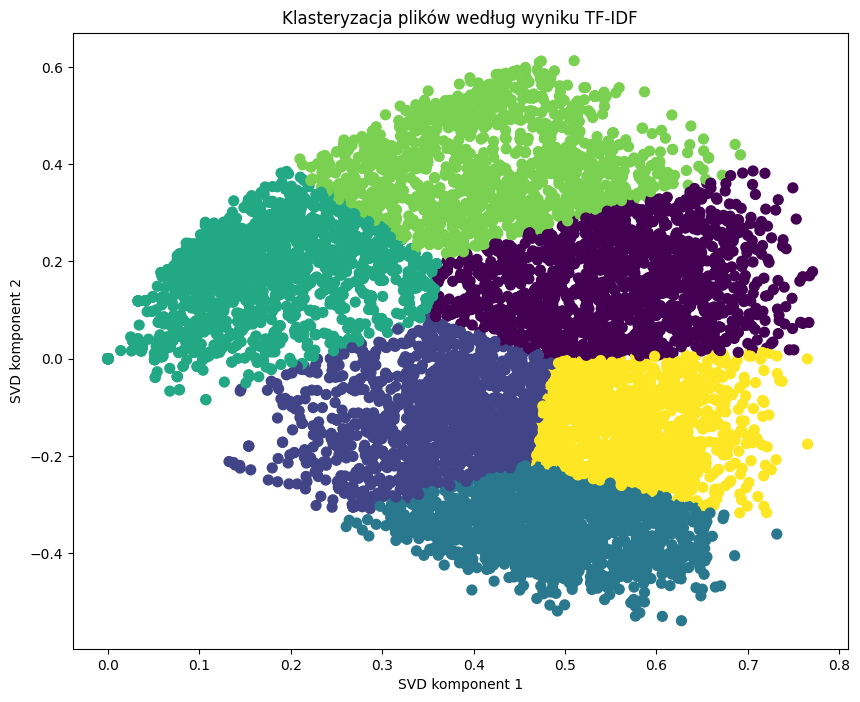

In [16]:
# Reduce dimensionality using Truncated SVD for visualization
svd = TruncatedSVD(n_components=2)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

# Apply k-means clustering
num_clusters = 6  # Adjust the number of clusters based on your needs
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_reduced)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(tfidf_reduced[:, 0], tfidf_reduced[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('Klasteryzacja plików według wyniku TF-IDF')
plt.xlabel('SVD komponent 1')
plt.ylabel('SVD komponent 2')
plt.show()

In [17]:
from collections import Counter
import os

def count_extensions(file_paths):
    return Counter(os.path.splitext(path)[1].lower() for path in file_paths)

for cluster_num in range(num_clusters):
    cluster_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_num]
    cluster_files = [file_paths[i] for i in cluster_indices]
    
    print(f"\nKlaster {cluster_num + 1} - Liczba dokumentów: {len(cluster_indices)}")
    
    # Liczenie rozszerzeń
    extension_counts = count_extensions(cluster_files)
    
    # Wyświetlanie liczby plików dla każdego rozszerzenia
    for ext, count in extension_counts.most_common():
        if ext:
            print(f"{ext}: {count}")
        else:
            print(f"Brak rozszerzenia: {count}")
    
    # Wyświetlanie przykładowych plików (opcjonalnie)
    print("\nPrzykładowe pliki:")
    for path in cluster_files[:5]:
        print(path)


Klaster 1 - Liczba dokumentów: 1564
.cs: 1495
.ps1: 35
.md: 19
.js: 13
.ts: 2

Przykładowe pliki:
E:\CSharpDataset\Changelog.cs
E:\CSharpDataset\build_7.ps1
E:\CSharpDataset\pipeline-logging-functions_1.ps1
E:\CSharpDataset\SetupNugetSources_1.ps1
E:\CSharpDataset\post-build-utils_1.ps1

Klaster 2 - Liczba dokumentów: 1581
.cs: 1518
.js: 51
.ps1: 4
.ts: 2
.md: 2
.csx: 1
.sql: 1
.xml: 1
.bat: 1

Przykładowe pliki:
E:\CSharpDataset\DebugWindow.cs
E:\CSharpDataset\Service.cs
E:\CSharpDataset\SimpleLog.cs
E:\CSharpDataset\SimpleWindow.cs
E:\CSharpDataset\GlobalAssemblyInfo.cs

Klaster 3 - Liczba dokumentów: 1724
.cs: 1724

Przykładowe pliki:
E:\CSharpDataset\OverhaulMod.cs
E:\CSharpDataset\Events.cs
E:\CSharpDataset\EzyTcpClient.cs
E:\CSharpDataset\Asn1Encodable_1.cs
E:\CSharpDataset\Asn1EncodableVector_1.cs

Klaster 4 - Liczba dokumentów: 2169
.json: 557
.yml: 493
.xaml: 331
.ps1: 246
.md: 158
.cs: 153
.xml: 80
.bat: 43
.js: 39
.css: 23
.resx: 18
.cshtml: 12
.ts: 10
.sql: 6

Przykładowe 

In [18]:
term_frequency = tfidf_df.sum().sort_values(ascending=False)
print("\nCzęstotliwość występowania terminów we wszystkich dokumentach:")
print(term_frequency)


Częstotliwość występowania terminów we wszystkich dokumentach:
public    1267.580684
the       1144.116070
new        897.778668
using      875.040965
this       868.345676
             ...     
used        74.029223
linq        73.275211
only        64.048756
which       64.021299
but         61.487798
Length: 137, dtype: float64


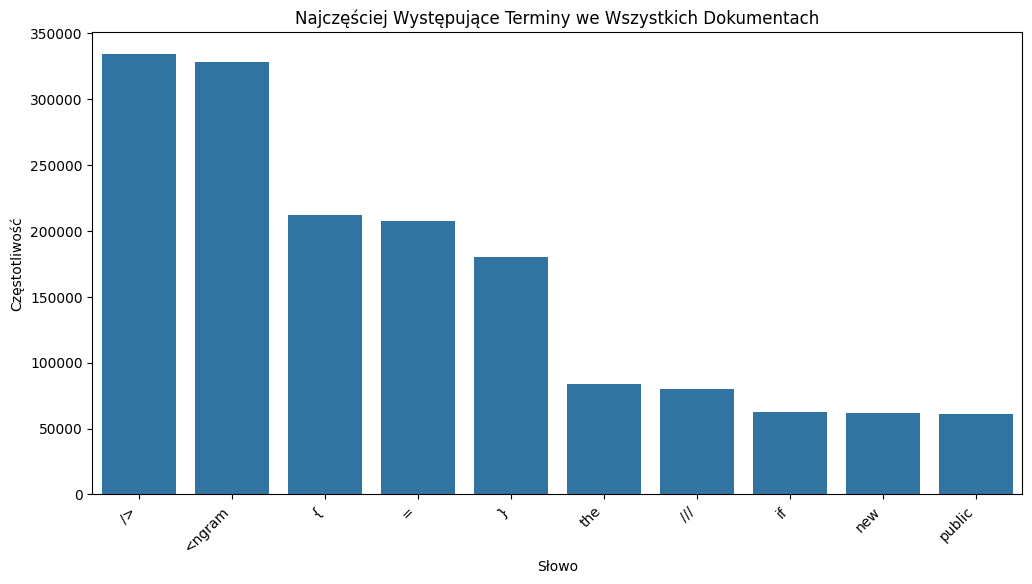

Top Words and Their Frequencies:
/>: 333745
<ngram: 328000
{: 211863
=: 207403
}: 179999
the: 84138
///: 80065
if: 62438
new: 61701
public: 61266


In [19]:
from collections import Counter

def preprocess_text(text):
    return text.lower().split()

batch_size = 2000
word_counter = Counter()
files_with_most_common_word = []

for batch_index in range(0, len(file_paths), batch_size):
    batch_file_paths = file_paths[batch_index:batch_index+batch_size]
    batch_words = []

    for file_path in batch_file_paths:
        try:
            with open(file_path, 'r', errors='ignore') as file:
                content = file.read()
                tokens = preprocess_text(content)
                batch_words.extend(tokens)

        except UnicodeDecodeError as e:
            print(f"Error decoding file {file_path}: {e}")

    batch_word_counter = Counter(batch_words)
    word_counter.update(batch_word_counter)

word_frequencies = pd.Series(word_counter).sort_values(ascending=False)

top_word_count = 10

plt.figure(figsize=(12, 6))
sns.barplot(x=word_frequencies.head(top_word_count).index, y=word_frequencies.head(top_word_count).values)
plt.title('Najczęściej Występujące Terminy we Wszystkich Dokumentach')
plt.xlabel('Słowo')
plt.ylabel('Częstotliwość')
plt.xticks(rotation=45, ha='right')
plt.show()

print("Top Words and Their Frequencies:")
for word, frequency in word_frequencies.head(top_word_count).items():
    print(f"{word}: {frequency}")

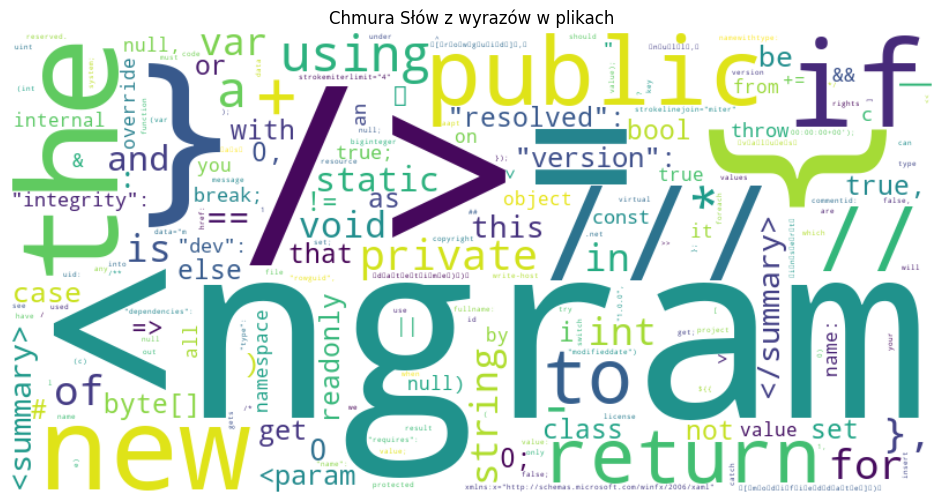

In [20]:
from wordcloud import WordCloud

# Generate a word cloud from word frequencies
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Chmura Słów z wyrazów w plikach')
plt.show()

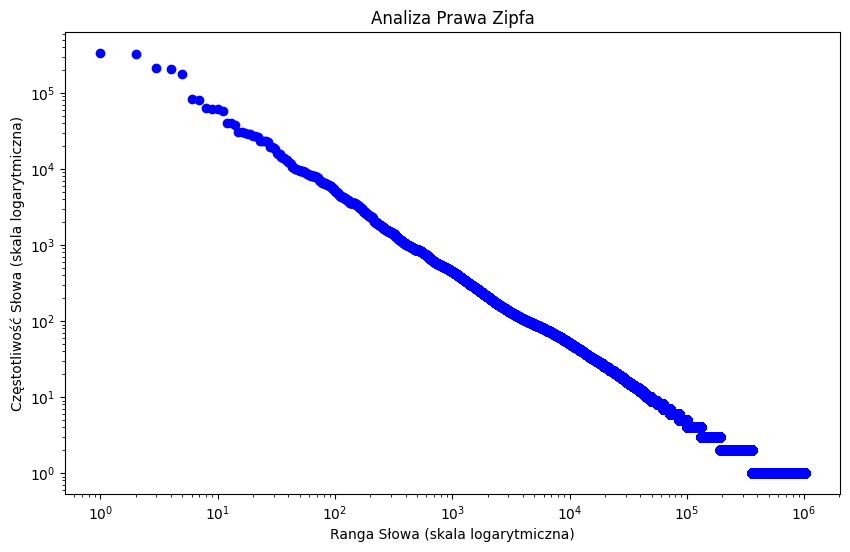

In [21]:
import numpy as np

# Obliczenie rangi i częstotliwości dla każdego słowa
word_rank = np.arange(1, len(word_frequencies) + 1)
word_frequency_values = word_frequencies.values

# Wykres log-log
plt.figure(figsize=(10, 6))
plt.loglog(word_rank, word_frequency_values, marker='o', linestyle='', color='b')
plt.title("Analiza Prawa Zipfa")
plt.xlabel('Ranga Słowa (skala logarytmiczna)')
plt.ylabel('Częstotliwość Słowa (skala logarytmiczna)')
plt.show()

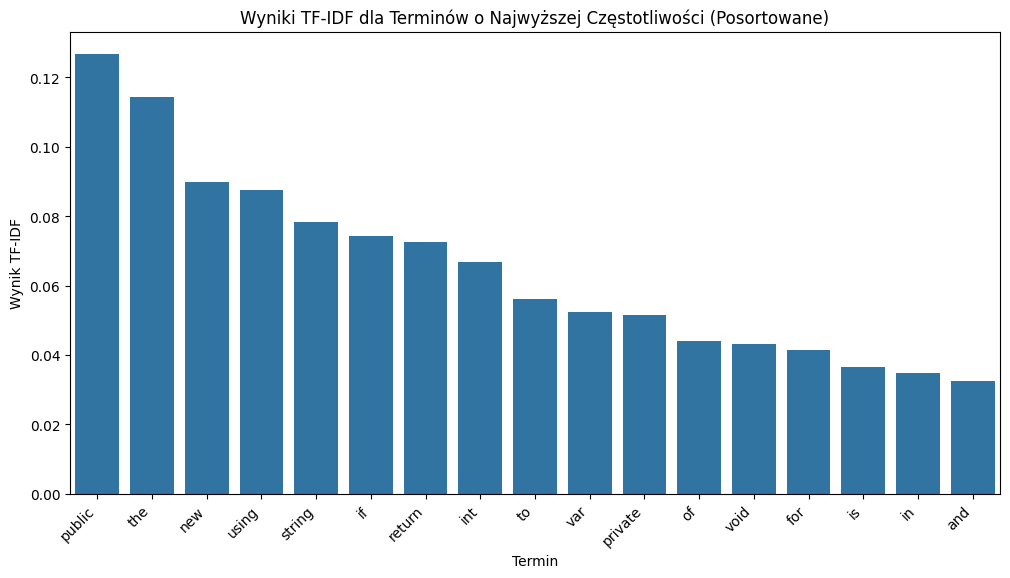

In [22]:
# Wybór 30 terminów o najwyższej częstotliwości
top_frequency_terms = word_frequencies.head(30).index

# Upewnienie się, że wybrane terminy są obecne w macierzy TF-IDF
common_terms = list(set(top_frequency_terms).intersection(tfidf_df.columns))

# Wydobycie wyników TF-IDF dla wspólnych terminów
tfidf_top_frequency_terms = tfidf_df[common_terms]

# Sortowanie kolumn tfidf_top_frequency_terms według średnich wyników TF-IDF
sorted_columns = tfidf_top_frequency_terms.mean().sort_values(ascending=False).index

# Wykres słupkowy wyników TF-IDF dla wspólnych terminów z posortowanymi kolumnami
plt.figure(figsize=(12, 6))
sns.barplot(x=sorted_columns, y=tfidf_top_frequency_terms.mean()[sorted_columns].values)
plt.title('Wyniki TF-IDF dla Terminów o Najwyższej Częstotliwości (Posortowane)')
plt.xlabel('Termin')
plt.ylabel('Wynik TF-IDF')
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
# Tokenizacja i przetwarzanie wstępne każdego pliku kodu
preprocessed_files = [' '.join(preprocess_text(open(file_path, 'r', errors='ignore').read())) for file_path in file_paths]

# Konwersja przetworzonych plików do reprezentacji TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(preprocessed_files)

# Zastosowanie Latent Dirichlet Allocation (LDA) do modelowania tematów
num_topics = 6  # Możesz dostosować liczbę tematów według potrzeb
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_matrix = lda.fit_transform(tfidf_matrix)

# Wyświetlenie najważniejszych słów dla każdego tematu
feature_names = tfidf_vectorizer.get_feature_names_out()
num_top_words = 10  # Możesz dostosować liczbę wyświetlanych najważniejszych słów dla każdego tematu

for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    print(f"Temat {topic_idx + 1}: {', '.join(top_words)}")

Temat 1: string, summary, var, path, license, public, using, write, param, wixtoolset
Temat 2: grid, uint, ecfieldelement, public, return, ulong, color, new, width, maui
Temat 3: dotnet, version, assembly, build, canvas, sdk, com, release, true, path
Temat 4: summary, public, using, csla, return, object, gnu, obj, copyright, helios
Temat 5: byte, public, new, bouncycastle, int, org, return, using, private, crypto
Temat 6: https, public, set, int, github, fields, com, new, string, intermediatefielddefinition


In [24]:
import pyLDAvis.lda_model
pyLDAvis.enable_notebook()

# Visualize the LDA model
vis = pyLDAvis.lda_model.prepare(lda, tfidf_matrix, tfidf_vectorizer)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.004077 -0.130914       1        1  21.283823
4      0.166051  0.025547       2        1  20.683148
3      0.165506 -0.073590       3        1  19.135653
5     -0.080855 -0.062582       4        1  16.927512
2     -0.258485  0.001927       5        1  13.511472
1      0.011860  0.239613       6        1   8.458392, topic_info=              Term        Freq       Total Category  logprob  loglift
1358          byte  221.000000  221.000000  Default  30.0000  30.0000
4188       summary  439.000000  439.000000  Default  29.0000  29.0000
1306  bouncycastle  182.000000  182.000000  Default  28.0000  28.0000
1714          csla  143.000000  143.000000  Default  27.0000  27.0000
1922        dotnet  125.000000  125.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
3171           new   27.452094  395.320734   Topic6  -5.0279  -0.1972
4298          text   19.876264   87.150248   Topic6  -5.3508   0.9919
4551         value   21.298209  219.159652   Topic6  -5.2817   0.1388
2636           int   20.869419  317.451758   Topic6  -5.3021  -0.2520
4555           var   18.574412  219.369499   Topic6  -5.4186   0.0010

[417 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
74        3  0.166353    0d
74        6  0.831763    0d
95        2  0.930901  0xff
230       5  0.934214    1e
241       4  0.021479  2006
...     ...       ...   ...
4771      4  0.982723   xsd
4805      6  0.903179    z1
4809      6  0.940645    z3
4826      6  0.913026    zz
4841      1  0.941314    çš

[805 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 5, 4, 6, 3, 2])

In [25]:
# Uzyskanie rozkładów tematów dla dokumentów
document_topic_distributions = lda.transform(tfidf_matrix)

# Wydrukowanie dominującego tematu dla każdego dokumentu
for i, doc_topics in enumerate(document_topic_distributions):
    dominant_topic = doc_topics.argmax()
    print(f"Dokument {i + 1}: Dominujący Temat - {dominant_topic + 1}")

Dokument 1: Dominujący Temat - 3
Dokument 2: Dominujący Temat - 6
Dokument 3: Dominujący Temat - 3
Dokument 4: Dominujący Temat - 3
Dokument 5: Dominujący Temat - 6
Dokument 6: Dominujący Temat - 2
Dokument 7: Dominujący Temat - 5
Dokument 8: Dominujący Temat - 1
Dokument 9: Dominujący Temat - 1
Dokument 10: Dominujący Temat - 4
Dokument 11: Dominujący Temat - 1
Dokument 12: Dominujący Temat - 5
Dokument 13: Dominujący Temat - 3
Dokument 14: Dominujący Temat - 2
Dokument 15: Dominujący Temat - 6
Dokument 16: Dominujący Temat - 6
Dokument 17: Dominujący Temat - 3
Dokument 18: Dominujący Temat - 1
Dokument 19: Dominujący Temat - 3
Dokument 20: Dominujący Temat - 3
Dokument 21: Dominujący Temat - 1
Dokument 22: Dominujący Temat - 1
Dokument 23: Dominujący Temat - 6
Dokument 24: Dominujący Temat - 6
Dokument 25: Dominujący Temat - 6
Dokument 26: Dominujący Temat - 3
Dokument 27: Dominujący Temat - 6
Dokument 28: Dominujący Temat - 3
Dokument 29: Dominujący Temat - 3
Dokument 30: Dominujący

In [26]:
import gensim
from gensim.models import TfidfModel, LdaModel, CoherenceModel
from gensim.corpora import Dictionary

# Tokenizacja i przetwarzanie wstępne każdego pliku kodu
preprocessed_files = [preprocess_text(open(file_path, 'r', errors='ignore').read()) for file_path in file_paths]

# Utworzenie słownika Gensim
dictionary = Dictionary(preprocessed_files)

# Utworzenie korpusu Gensim
corpus = [dictionary.doc2bow(text) for text in preprocessed_files]

# Utworzenie modelu TF-IDF z korpusu
tfidf_model = TfidfModel(corpus)
tfidf_corpus = tfidf_model[corpus]

# Zastosowanie Latent Dirichlet Allocation (LDA) do modelowania tematów
num_topics = 6  # Możesz dostosować liczbę tematów według potrzeb
lda_model = LdaModel(corpus=tfidf_corpus, id2word=dictionary, num_topics=num_topics, random_state=42)

# Obliczenie wskaźnika spójności (coherence score) za pomocą gensim
coherence_model_lda = CoherenceModel(model=lda_model, texts=preprocessed_files, dictionary=dictionary)
coherence_lda = coherence_model_lda.get_coherence()

print(f"Wskaźnik spójności: {coherence_lda}")

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary<0 unique tokens: []>
INFO:gensim.corpora.dictionary:built Dictionary<1015321 unique tokens: ['"2020-02-20"', '"https://maestro-prod.westus2.cloudapp.azure.com"', '#', '$(maestroaccesstoken)', '${{']...> from 10000 documents (total 7297935 corpus positions)
INFO:gensim.utils:Dictionary lifecycle event {'msg': 'built Dictionary<1015321 unique tokens: [\'"2020-02-20"\', \'"https://maestro-prod.westus2.cloudapp.azure.com"\', \'#\', \'$(maestroaccesstoken)\', \'${{\']...> from 10000 documents (total 7297935 corpus positions)', 'datetime': '2025-01-07T23:05:05.465105', 'gensim': '4.3.2', 'python': '3.10.11 (tags/v3.10.11:7d4cc5a, Apr  5 2023, 00:38:17) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22631-SP0', 'event': 'created'}
INFO:gensim.models.tfidfmodel:collecting document frequencies
INFO:gensim.models.tfidfmodel:PROGRESS: processing document #0
INFO:gensim.utils:TfidfModel lifecycle event {'msg': 'calculated 

Wskaźnik spójności: 0.5197102007800763


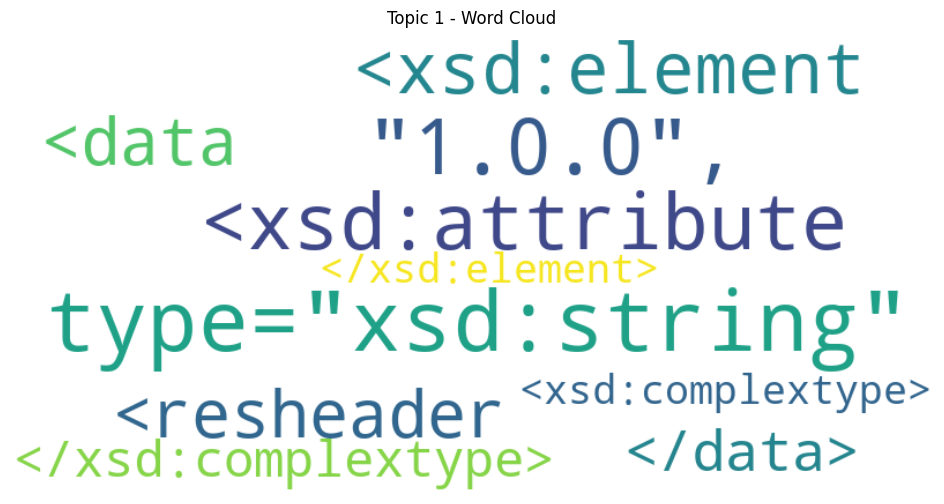

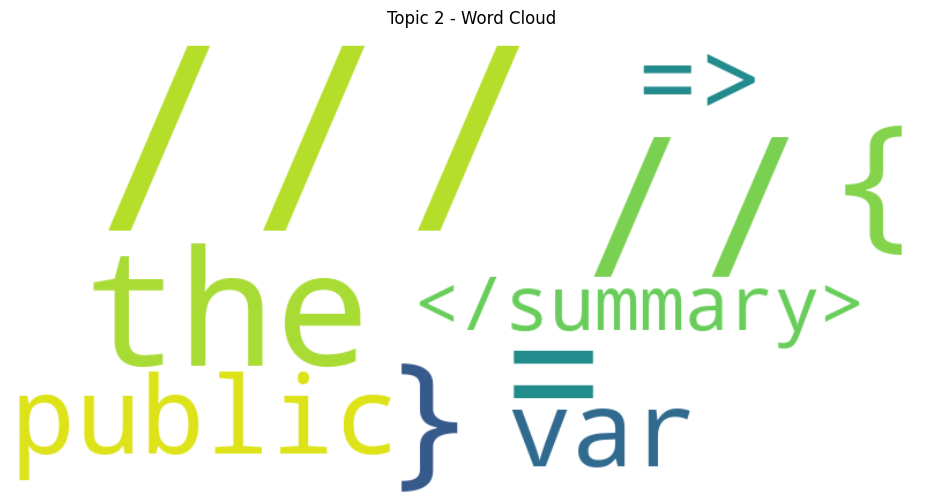

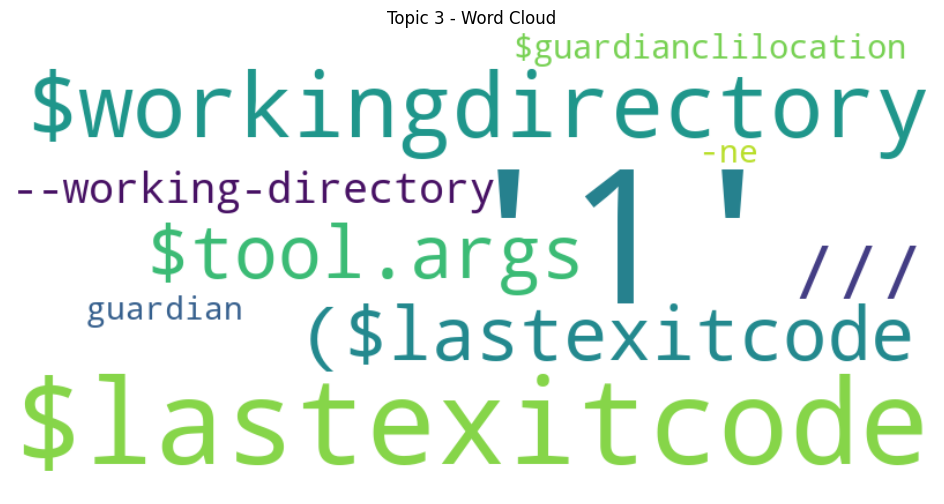

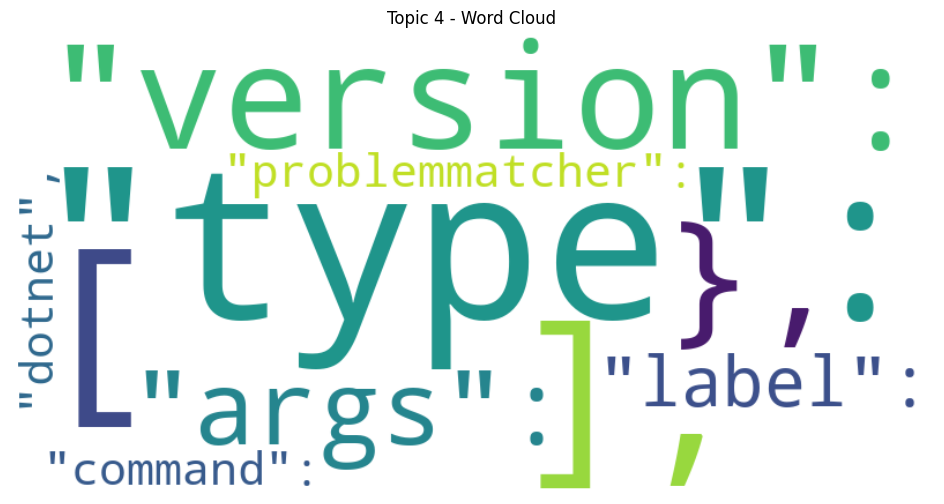

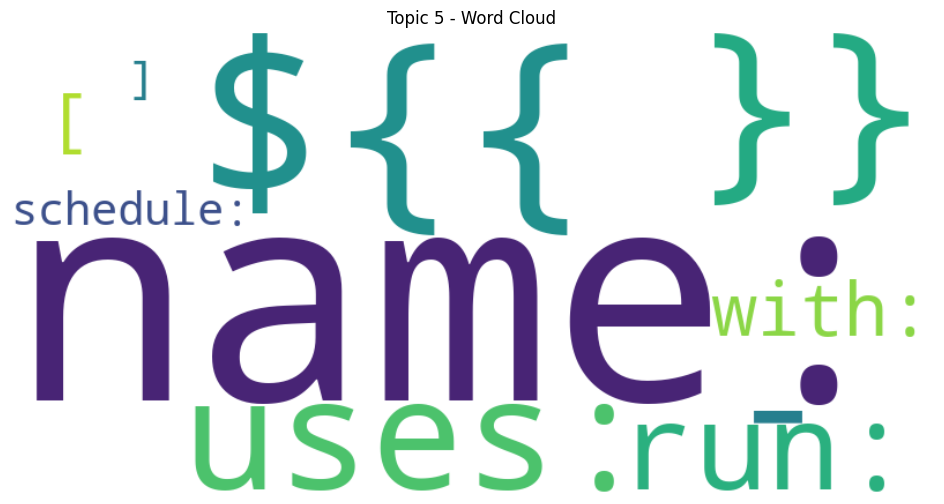

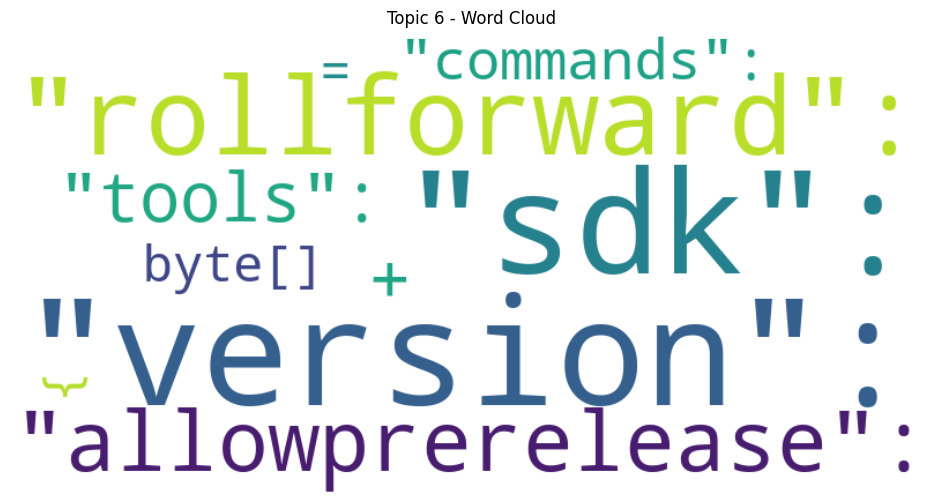

In [27]:
from wordcloud import WordCloud

# Generate word clouds for each topic
for topic_id in range(num_topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(lda_model.show_topic(topic_id, topn=10)))
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {topic_id + 1} - Word Cloud')
    plt.show()

In [28]:
import pandas as pd

# Create a DataFrame for the document-topic matrix
document_topic_matrix = pd.DataFrame(lda_model.get_document_topics(tfidf_corpus), columns=[f'Topic_{i + 1}' for i in range(num_topics)])

# Display the document-topic matrix
print(document_topic_matrix.head())

            Topic_1          Topic_2           Topic_3           Topic_4  \
0   (0, 0.03345676)  (1, 0.21662693)  (2, 0.033450704)  (3, 0.033451743)   
1  (0, 0.030903403)   (1, 0.5577419)  (2, 0.030897914)   (3, 0.31865284)   
2   (0, 0.09747352)  (1, 0.09990165)  (2, 0.096551865)   (3, 0.22567907)   
3   (0, 0.06661067)   (1, 0.6674406)   (2, 0.06641936)   (3, 0.06641893)   
4   (0, 0.02557952)   (1, 0.8721074)   (2, 0.02556897)  (3, 0.025579505)   

            Topic_5           Topic_6  
0   (4, 0.64955837)  (5, 0.033455532)  
1  (4, 0.030906107)  (5, 0.030897839)  
2  (4, 0.098035924)   (5, 0.38235795)  
3   (4, 0.06666927)  (5, 0.066441126)  
4  (4, 0.025592998)  (5, 0.025571575)  


                       N-gram  Count
1741740            text count  36008
0                       00 00  23905
505450    auth0 managementapi  13990
1462113         public static  10614
5026                    01 00   9529
1735006               text _ŕ   8904
1220319  managementapi models   8686
958181        function return   8635
1353570      org bouncycastle   8492
1790758             throw new   8369


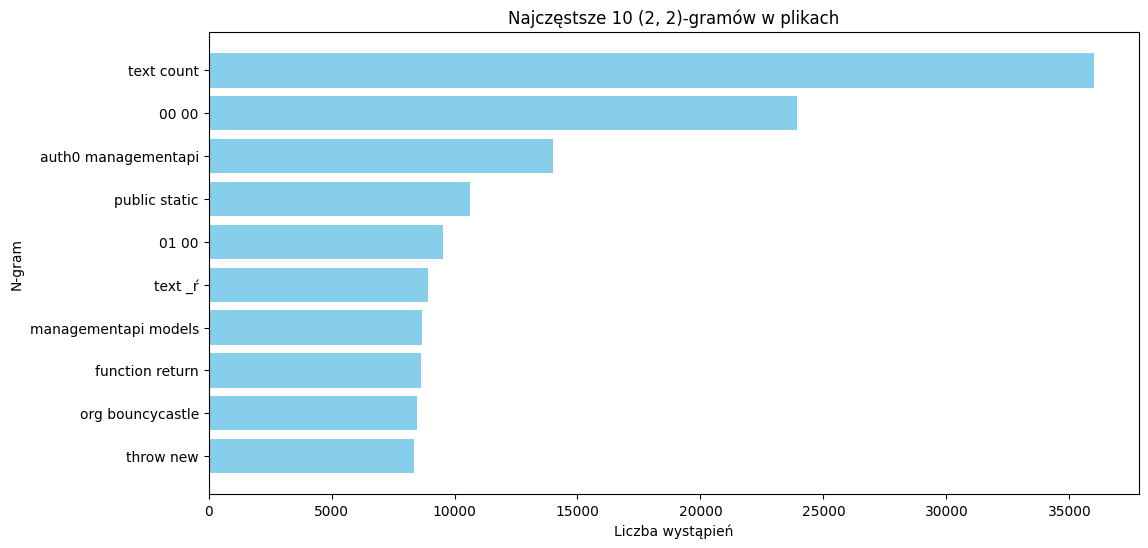

In [29]:
# Tokenizacja i przetwarzanie wstępne każdego pliku kodu
preprocessed_files = [' '.join(preprocess_text(open(file_path, 'r', errors='ignore').read())) for file_path in file_paths]

# Ustawienie zakresu N dla N-gramów (np. dla bigramów ustaw ngram_range=(2, 2))
ngram_range = (2, 2)

# Utworzenie CountVectorizer z określonym zakresem N-gramów
vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')

# Dopasowanie i przekształcenie przetworzonych plików
ngrams_matrix = vectorizer.fit_transform(preprocessed_files)

# Uzyskanie nazw cech (N-gramów)
ngrams = vectorizer.get_feature_names_out()

# Obliczenie całkowitej liczby wystąpień każdego N-gramu
ngrams_counts = ngrams_matrix.sum(axis=0).A1

# Utworzenie DataFrame do przechowywania wystąpień N-gramów
ngrams_df = pd.DataFrame({'N-gram': ngrams, 'Count': ngrams_counts})

# Sortowanie N-gramów według liczby wystąpień w porządku malejącym
ngrams_df = ngrams_df.sort_values(by='Count', ascending=False)

# Wyświetlenie najczęstszych N-gramów
top_ngrams = 10  # Wyświetlenie 10 N-gramów po pominięciu pierwszego
print(ngrams_df.iloc[1:top_ngrams+1])

# Wykres słupkowy najczęstszych N-gramów, pomijając pierwszy
plt.figure(figsize=(12, 6))
plt.barh(ngrams_df['N-gram'][1:top_ngrams+1][::-1], ngrams_df['Count'][1:top_ngrams+1][::-1], color='skyblue')
plt.title(f'Najczęstsze {top_ngrams} {ngram_range}-gramów w plikach')
plt.xlabel('Liczba wystąpień')
plt.ylabel('N-gram')
plt.show()

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import scipy.sparse as sp

# Assuming you have already collected and preprocessed your text data
# Use the same preprocess_text function you defined earlier

# Tokenize and preprocess each code file
preprocessed_files = [' '.join(preprocess_text(open(file_path, 'r', errors='ignore').read())) for file_path in file_paths]

# Create a CountVectorizer
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the preprocessed files
word_count_matrix = count_vectorizer.fit_transform(preprocessed_files)

# Get feature names (terms)
terms = count_vectorizer.get_feature_names_out()

# Calculate the mean of word frequencies across all documents
mean_word_freq = word_count_matrix.mean(axis=0).A1

# Calculate the standard deviation of word frequencies across all documents
std_word_freq = sp.csr_matrix(word_count_matrix.copy()).power(2).mean(axis=0).A1 - np.power(mean_word_freq, 2)

# Create a DataFrame to store the statistical descriptors
corpus_summary_df = pd.DataFrame({'Term': terms, 'Mean_Frequency': mean_word_freq, 'Std_Dev_Frequency': np.sqrt(std_word_freq)})

# Sort the DataFrame by mean frequency in descending order
corpus_summary_df = corpus_summary_df.sort_values(by='Mean_Frequency', ascending=False)

# Display the top terms with their mean and standard deviation of frequencies
top_terms = 20  # You can adjust this value based on how many top terms you want to display
print(corpus_summary_df.head(top_terms))

            Term  Mean_Frequency  Std_Dev_Frequency
420972      text         33.7631        3279.924466
238781     count         33.2991        3279.892199
348789     ngram         32.8000        3279.835996
347857       new          8.3076          93.037441
388783    return          6.6212         103.067402
378099    public          6.5906          54.531857
411203    string          5.6151          48.875517
442049       var          4.4976          70.939979
352830      null          4.0756          58.657974
309057       int          3.9048          34.081220
412623   summary          3.7319          40.311954
441805     value          3.6996          49.713123
282904  function          3.6827         129.561283
0             00          3.4974         199.040736
427673      true          3.3356          44.695017
439851     using          3.1407           4.429233
375527   private          2.9550          25.688927
363088     param          2.7449          21.948513
234895      

In [31]:
import numpy as np

# Assuming you have already created the TF-IDF matrix (tfidf_matrix)
# You should have the tfidf_vectorizer and file_paths available

# Convert the TF-IDF matrix to a dense array
dense_tfidf_matrix = tfidf_matrix.toarray()

# Calculate the mean and standard deviation of word frequencies across all documents
mean_word_freq = np.mean(dense_tfidf_matrix, axis=0)
std_word_freq = np.std(dense_tfidf_matrix, axis=0)

# Get the feature names (terms) from the TF-IDF vectorizer
terms = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to store the statistical descriptors
corpus_summary_df = pd.DataFrame({'Term': terms, 'Mean_Frequency': mean_word_freq, 'Std_Dev_Frequency': std_word_freq})

# Sort the DataFrame by mean frequency in descending order
corpus_summary_df = corpus_summary_df.sort_values(by='Mean_Frequency', ascending=False)

# Display the top terms with their mean and standard deviation of frequencies
top_terms = 20  # You can adjust this value based on how many top terms you want to display
print(corpus_summary_df.head(top_terms))

              Term  Mean_Frequency  Std_Dev_Frequency
3608        public        0.067320           0.079667
4188       summary        0.048802           0.117200
3171           new        0.043838           0.066182
4529         using        0.042658           0.061583
4144        string        0.042147           0.074916
3813        return        0.035537           0.058858
2636           int        0.035253           0.080537
3536       private        0.025728           0.046017
1358          byte        0.025118           0.081044
3362         param        0.024893           0.072987
2860       license        0.024232           0.065199
4551         value        0.023958           0.059476
4555           var        0.023866           0.067900
3964           set        0.022848           0.063888
4120        static        0.022200           0.050212
3289           org        0.020645           0.043893
1306  bouncycastle        0.020599           0.051588
4609          void        0.

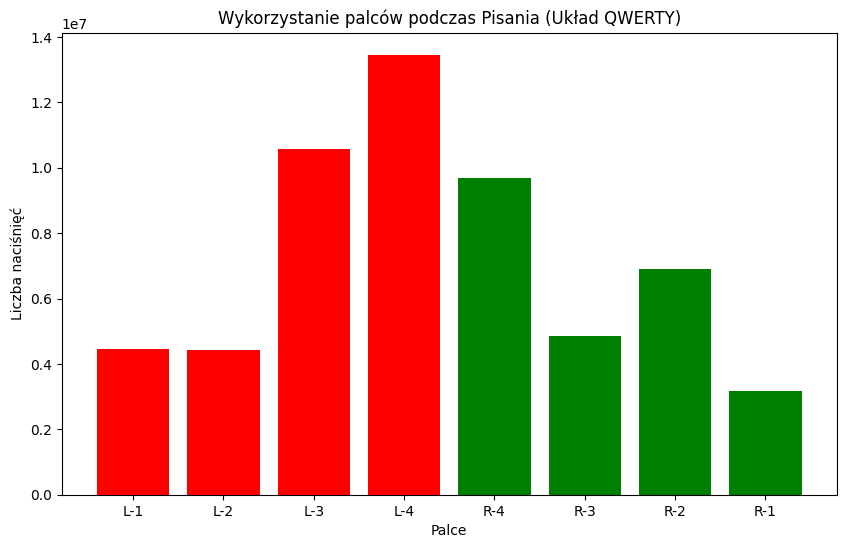

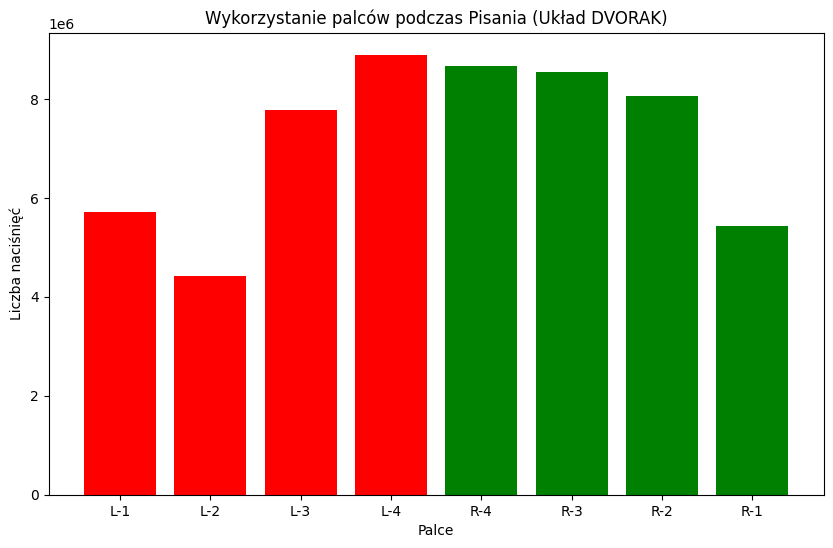

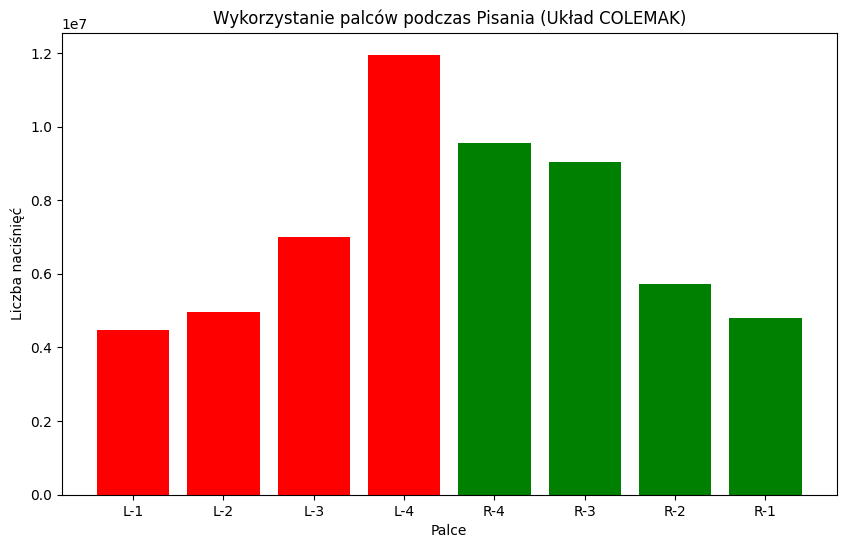

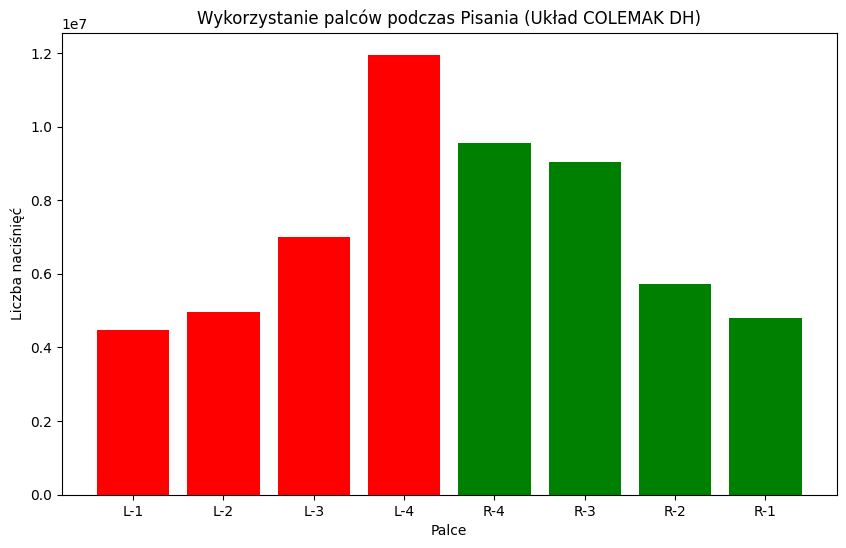

In [32]:
import matplotlib.pyplot as plt

corpus = [text for text in preprocessed_files]

QWERTY_layout = [
    'qaz', 'wsx', 'edc', 'rfvtgb', 
    'yhnujm', 'ik,', 'ol.', 'p;/' 
]

DVORAK_layout = [
    '/a;', ',oq', '.ej', 'pukyix', 
    'fdbghm', 'ctw,', 'rnv', 'lsz' 
]

COLEMAK_layout = [
    'qaz', 'wrx', 'fsc', 'ptvgdb', 
    'jhklnm', 'ue,', 'yi.', ';o/' 
]

COLEMAK_DH_layout = [
    'qaz', 'wrx', 'fsc', 'ptdbgv', 
    'jmklnh', 'ue,', 'yi.', ';o/' 
]

def print_finger_usage_in_typing(layout, layout_name):

    # Inicjalizacja licznika użycia palców
    finger_names = ['L-1', 'L-2', 'L-3', 'L-4',
                    'R-4', 'R-3', 'R-2', 'R-1']

    finger_counts = dict(zip(finger_names, [0] * 8)) 

    # Przetwarzanie korpusu
    for word in corpus:
        for letter in word.lower():  # Normalizacja wielkości liter
            for i, row in enumerate(layout):
                if letter in row:
                    finger_counts[finger_names[i]] += 1
                    break

    # Wykres statystyk użycia palców
    left_colors = ['red'] * 4
    right_colors = ['green'] * 4

    # Wykres statystyk użycia palców
    plt.figure(figsize=(10, 6))
    plt.bar(finger_counts.keys(), finger_counts.values(), color=left_colors + right_colors)
    
    # Wprowadzenie odstępu między rękami
    plt.title(f'Wykorzystanie palców podczas Pisania (Układ {layout_name})')
    plt.xlabel('Palce')
    plt.ylabel('Liczba naciśnięć')
    plt.show() 

print_finger_usage_in_typing(QWERTY_layout, 'QWERTY')
print_finger_usage_in_typing(DVORAK_layout, 'DVORAK')
print_finger_usage_in_typing(COLEMAK_layout, 'COLEMAK')
print_finger_usage_in_typing(COLEMAK_DH_layout, 'COLEMAK DH')

In [53]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Układ QWERTY (jak wcześniej)
QWERTY_layout = [
    'qwertyuiop',
    'asdfghjkl;',
    'zxcvbnm,./'
]

# Układ DVORAK
DVORAK_layout = [
    '/,.pyfgcrl',
    'aoeuidhtns',
    ';qjkxbmwvz'
]

# Układ COLEMAK
COLEMAK_layout = [
    'qwfpgjluy;',
    'arstdhneio',
    'zxcvbkm,./'
]

# Układ COLEMAK DH
COLEMAK_DH_layout = [
    'qwfpbjluy;',
    'arstgmneio',
    'zxcdvkh,./'
]

GENERATED_layout_old = [
    'ufgp/.mych',
    'atsndilero',
    'k,xwqvj;zb'
]

GENERATED_layout = {
    'pblvdqk,;.',
    'mrntsuaoie',
    'wxgcfjz/yh',
}



def draw_layout_key_usage_heatmap(layout, layout_name, corpus):
    # Inicjalizacja mapy ciepła liter (początkowo wszystkie zera)
    max_row_length = max(len(row) for row in layout)
    heatmap = np.zeros((len(layout), max_row_length))

    # Przetwarzanie korpusu w celu zbudowania mapy ciepła
    for word in corpus:
        for letter in word.lower():
            for y, row in enumerate(layout):
                if letter in row:
                    x = row.index(letter)
                    heatmap[y, x] += 1
                    break

    # Wyświetlenie mapy ciepła
    plt.figure(figsize=(10, 5))

    # Invert the layout list
    inverted_layout = layout

    # Dodanie tekstowych etykiet do każdej komórki, using the inverted layout
    for y in range(heatmap.shape[0]):
        for x in range(heatmap.shape[1]):
          if x < len(inverted_layout[y]):
            label = inverted_layout[y][x]  # Pobranie litery z odwroconego ukladu
            plt.text(x, y, label, ha='center', va='center', color='black')  # Dodanie tekstu

    # Użycie nieliniowej normalizacji kolorów
    divnorm = mcolors.TwoSlopeNorm(vmin=heatmap.min(), vcenter=heatmap.mean(), vmax=heatmap.max())
    my_cmap = plt.cm.get_cmap('RdYlGn')  # Użycie odwróconej kolorowej mapy ciepła Red-Yellow-Green

    # Wyświetlenie mapy ciepła z użyciem colormapy
    plt.imshow(heatmap, cmap=my_cmap, norm=divnorm, interpolation='nearest')
    plt.colorbar(label='Częstość naciśnięcia klawiszy')
    plt.title(f'Mapa ciepła wykorzystania klawiszy ({layout_name})')

    # Obrót etykiet osi x, jeśli jest to konieczne dla czytelności
    if heatmap.shape[1] > 15:
        plt.xticks(rotation=90)

    plt.show()

#draw_layout_key_usage_heatmap(QWERTY_layout, "QWERTY", corpus)
#draw_layout_key_usage_heatmap(DVORAK_layout, "DVORAK", corpus)
#draw_layout_key_usage_heatmap(COLEMAK_layout, "COLEMAK", corpus)
#draw_layout_key_usage_heatmap(COLEMAK_DH_layout, "COLEMAK_DH", corpus)
#draw_layout_key_usage_heatmap(GENERATED_layout_old, "GENERATED_OLD", corpus)


C:\Users\dev422\AppData\Local\Temp\ipykernel_18656\3422375208.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('RdYlGn')  # Użycie odwróconej kolorowej mapy ciepła Red-Yellow-Green


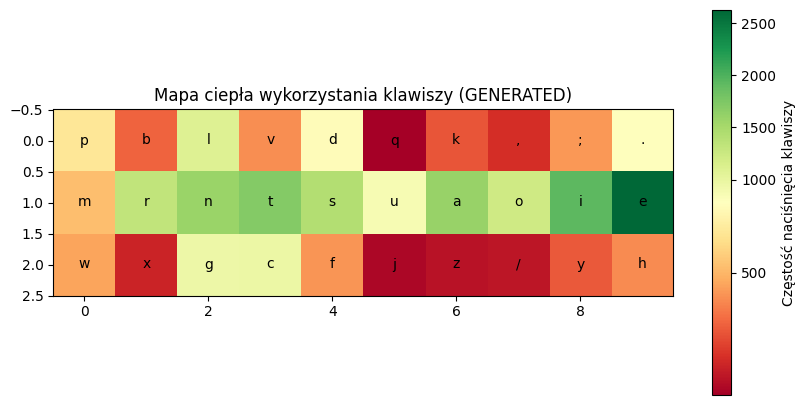

In [54]:
GENERATED_layout = [
    'pblvdqk,;.',
    'mrntsuaoie',
    'wxgcfjz/yh'
]

draw_layout_key_usage_heatmap(GENERATED_layout, "GENERATED", corpus)

C:\Users\dev422\AppData\Local\Temp\ipykernel_18656\3422375208.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('RdYlGn')  # Użycie odwróconej kolorowej mapy ciepła Red-Yellow-Green


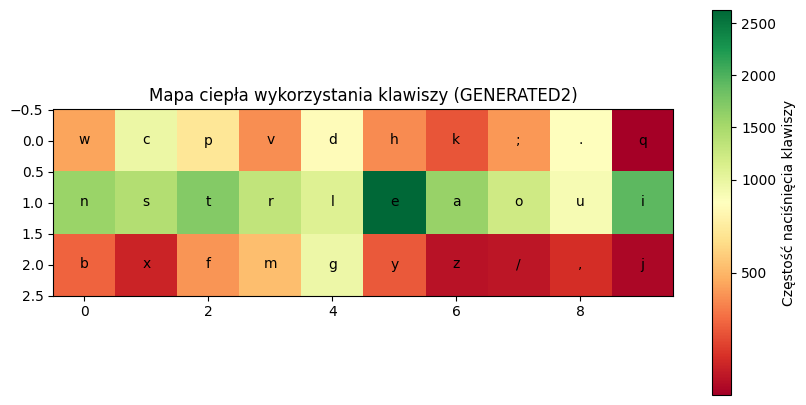

C:\Users\dev422\AppData\Local\Temp\ipykernel_18656\3422375208.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('RdYlGn')  # Użycie odwróconej kolorowej mapy ciepła Red-Yellow-Green


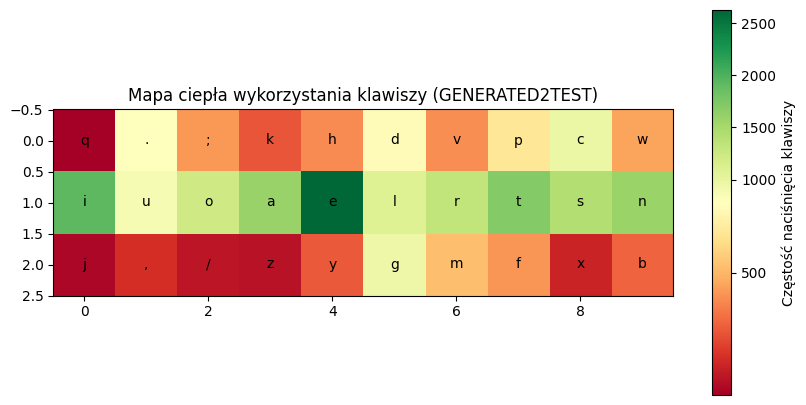

C:\Users\dev422\AppData\Local\Temp\ipykernel_18656\3422375208.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('RdYlGn')  # Użycie odwróconej kolorowej mapy ciepła Red-Yellow-Green


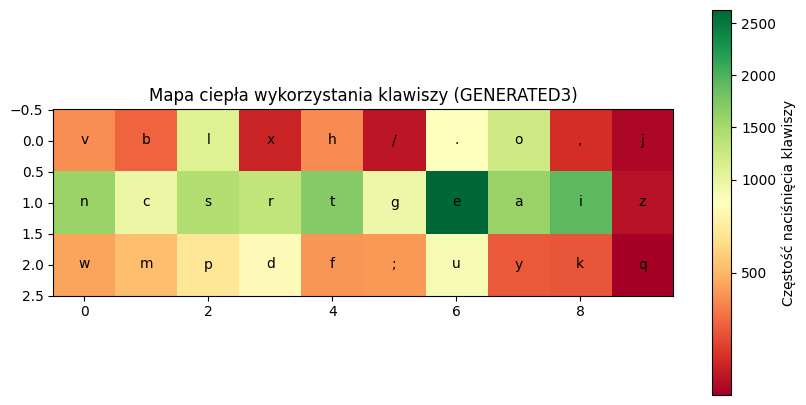

C:\Users\dev422\AppData\Local\Temp\ipykernel_18656\3422375208.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  my_cmap = plt.cm.get_cmap('RdYlGn')  # Użycie odwróconej kolorowej mapy ciepła Red-Yellow-Green


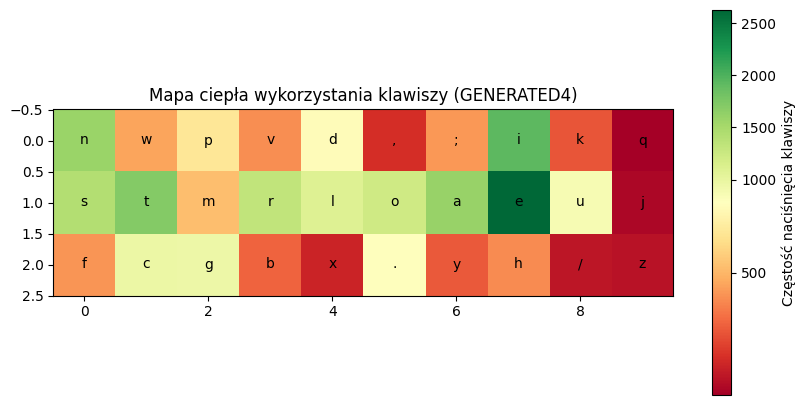

In [56]:
GENERATED_layout2 = [
    'wcpvdhk;.q',
    'nstrleaoui',
    'bxfmgyz/,j'
]

GENERATED_layout3 = [
'vblxh/.o,j',
'ncsrtgeaiz',
'wmpdf;uykq'
]

GENERATED_layout4 = [
'nwpvd,;ikq',
'stmrloaeuj',
'fcgbx.yh/z'
]

GENERATED_test_layout2 = [
    'q.;khdvpcw',
    'iuoaelrtsn',
    'j,/zygmfxb'
]


draw_layout_key_usage_heatmap(GENERATED_layout2, "GENERATED2", corpus)
draw_layout_key_usage_heatmap(GENERATED_test_layout2, "GENERATED2TEST", corpus)
draw_layout_key_usage_heatmap(GENERATED_layout3, "GENERATED3", corpus)
draw_layout_key_usage_heatmap(GENERATED_layout4, "GENERATED4", corpus)

In [36]:
import numpy as np

# Define home row, hand division, and weak fingers for each layout
QWERTY_home_row = set('asdfghjkl;')
DVORAK_home_row = set('aoeuidhtns')
COLEMAK_home_row = set('arstdhneio')
COLEMAK_DH_home_row = set('arstgmneio')

QWERTY_left_hand = set('qwertasdfgzxcvb')
DVORAK_left_hand = set('/,.pyaoeui;qjkx')
COLEMAK_left_hand = set('qazwrxfscptvgdb')
COLEMAK_DH_left_hand = set('qazwrxfscptdbgv')

weak_fingers = {
    'QWERTY': set('qazwsxol.p;/'),  # little and ring fingers for QWERTY
    'DVORAK': set('/a;,oqrnvlsz'),  # little and ring fingers for DVORAK
    'COLEMAK': set('qazwrxyi.;o/'),  # little and ring fingers for COLEMAK
    'COLEMAK_DH': set('qazwrxyi.;o/'),  # little and ring fingers for COLEMAK DH
}

# Function to calculate usage statistics
def calculate_usage_statistics(layout, layout_name, home_row, left_hand, weak_fingers, corpus):
    total_keys = 0
    home_row_count = 0
    left_hand_count = 0
    weak_fingers_count = 0

    for word in corpus:
        for letter in word.lower():
            if letter in ''.join(layout):
                total_keys += 1
                if letter in home_row:
                    home_row_count += 1
                if letter in left_hand:
                    left_hand_count += 1
                if letter in weak_fingers[layout_name]:
                    weak_fingers_count += 1

    home_row_percentage = (home_row_count / total_keys) * 100
    left_hand_percentage = (left_hand_count / total_keys) * 100
    weak_fingers_percentage = (weak_fingers_count / total_keys) * 100

    return home_row_percentage, left_hand_percentage, weak_fingers_percentage

# Corpus example
corpus = ["example", "text", "for", "testing", "the", "layouts"]
corpus = [text for text in preprocessed_files]

# Calculate and print usage statistics for each layout
layouts = {
    "QWERTY": (QWERTY_layout, QWERTY_home_row, QWERTY_left_hand),
    "DVORAK": (DVORAK_layout, DVORAK_home_row, DVORAK_left_hand),
    "COLEMAK": (COLEMAK_layout, COLEMAK_home_row, COLEMAK_left_hand),
    "COLEMAK_DH": (COLEMAK_DH_layout, COLEMAK_DH_home_row, COLEMAK_DH_left_hand)
}

for layout_name, (layout, home_row, left_hand) in layouts.items():
    home_row_percentage, left_hand_percentage, weak_fingers_percentage = calculate_usage_statistics(
        layout, layout_name, home_row, left_hand, weak_fingers, corpus
    )
    print(f"Układ {layout_name}:")
    print(f"Użycie środkowego rzędu: {home_row_percentage:.2f}%")
    print(f"Użycie lewej ręki: {left_hand_percentage:.2f}%")
    print(f"Użycie słabych palców: {weak_fingers_percentage:.2f}%\n")

Układ QWERTY:
Użycie środkowego rzędu: 27.98%
Użycie lewej ręki: 57.25%
Użycie słabych palców: 32.95%

Układ DVORAK:
Użycie środkowego rzędu: 58.95%
Użycie lewej ręki: 46.60%
Użycie słabych palców: 41.07%

Układ COLEMAK:
Użycie środkowego rzędu: 61.86%
Użycie lewej ręki: 49.39%
Użycie słabych palców: 34.71%

Układ COLEMAK_DH:
Użycie środkowego rzędu: 62.43%
Użycie lewej ręki: 49.39%
Użycie słabych palców: 34.71%



In [37]:
import copy
def str_intersection(s1, s2):
  out = ""
  for c in s1:
    if c in s2 and not c in out:
      out += c
  return out
    
def calculate_travel_distance(sentence, layout):
    top_indices =    [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
    middle_indices = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]
    bottom_indices = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29]

    top_row = [ layout[i] for i in top_indices]
    middle_row = [ layout[i] for i in middle_indices]
    bottom_row = [ layout[i] for i in bottom_indices]

    costs = {
        'top_row': 1.032,
        'bottom_row': 1.118,
        'vertical': 2.138,
        f'{layout[10]}{layout[12]}': 1.247, f'{layout[12]}{layout[10]}': 1.247,
        f'{layout[16]}{layout[18]}': 1.247, f'{layout[18]}{layout[16]}': 1.247,
        f'{layout[9]}{layout[13]}': 1.605, f'{layout[13]}{layout[9]}': 1.605,
        f'{layout[15]}{layout[19]}': 1.605, f'{layout[19]}{layout[15]}': 1.605,
        f'{layout[10]}{layout[14]}': 1.803, f'{layout[14]}{layout[10]}': 1.803,
        f'{layout[16]}{layout[20]}': 1.803, f'{layout[20]}{layout[16]}': 1.803,
        f'{layout[9]}{layout[14]}': 2.661, f'{layout[14]}{layout[9]}': 2.661,
        f'{layout[15]}{layout[20]}': 2.661, f'{layout[20]}{layout[15]}' : 2.661,
        f'{layout[12]}{layout[11]}': 2.015, f'{layout[11]}{layout[12]}': 2.015,
        f'{layout[18]}{layout[17]}': 2.015, f'{layout[17]}{layout[18]}': 2.015,
        f'{layout[9]}{layout[12]}': 1, f'{layout[12]}{layout[9]}': 1,
        f'{layout[10]}{layout[13]}': 1, f'{layout[13]}{layout[10]}': 1,
        f'{layout[11]}{layout[14]}': 1, f'{layout[14]}{layout[11]}': 1,
        f'{layout[18]}{layout[15]}': 1, f'{layout[15]}{layout[18]}': 1,
        f'{layout[19]}{layout[16]}': 1, f'{layout[16]}{layout[19]}': 1,
        f'{layout[20]}{layout[17]}': 1, f'{layout[17]}{layout[20]}': 1
    }

    hands = {
       'left': {
           'pinky': f'{layout[0]}{layout[1]}{layout[2]}',
           'ring': f'{layout[3]}{layout[4]}{layout[5]}',
           'middle': f'{layout[6]}{layout[7]}{layout[8]}',
           'index': f'{layout[9]}{layout[10]}{layout[11]}{layout[12]}{layout[13]}{layout[14]}'
       },
       'right': {
           'index': f'{layout[18]}{layout[19]}{layout[20]}{layout[15]}{layout[16]}{layout[17]}',
           'middle': f'{layout[21]}{layout[22]}{layout[23]}',
           'ring': f'{layout[24]}{layout[25]}{layout[26]}',
           'pinky': f'{layout[27]}{layout[28]}{layout[29]}'
       }
    }
    
    total_distance = 0
    current_hands = {
        'left': {
            'pinky': f'{layout[1]}',
            'ring': f'{layout[4]}',
            'middle': f'{layout[7]}',
            'index': f'{layout[10]}'
        },
        'right': {
            'pinky': f'{layout[28]}',
            'ring': f'{layout[25]}',
            'middle': f'{layout[22]}',
            'index': f'{layout[19]}'
        }
    }


    starting_hand = {
        'left': {
            'pinky': f'{layout[1]}',
            'ring': f'{layout[4]}',
            'middle': f'{layout[7]}',
            'index': f'{layout[10]}'
        },
        'right': {
            'pinky': f'{layout[28]}',
            'ring': f'{layout[25]}',
            'middle': f'{layout[22]}',
            'index': f'{layout[19]}'
        }
    }
    
    for prev_char, char in zip(' ' + sentence, sentence):  # Add space for starting positions

        if char not in layout:
            continue
        
        if char == ' ':
            current_hands = copy.deepcopy(starting_hand)
            continue
        
        char = char.lower()

        for hand, fingers in hands.items():
            for finger, column in fingers.items():
                if char in column:
                    current_finger = finger
                    current_hand_name = hand 
                    break 

        # Lookup Cost and Find Key Row
        prev_held_char = current_hands[current_hand_name][current_finger]
        key_pair = prev_held_char + char
        
        if key_pair in costs:
            distance = costs[key_pair]
        elif prev_held_char == char: 
            distance = 0 
        elif prev_held_char in middle_row:
            if char in bottom_row:
                distance = costs['bottom_row']
            else:
                distance = costs['top_row']
        elif prev_held_char in top_row:
            if char in middle_row:
                distance = costs['top_row']
            else:
                distance = costs['vertical']
        elif prev_held_char in bottom_row:
            if char in middle_row:
                distance = costs['bottom_row']
            else:
                distance = costs['vertical']
        else:
            print('unexpected')

        total_distance += distance
        
        # Update Finger Position
        current_hands[current_hand_name][current_finger] = char  # Press new key         
    return total_distance


# Example Usage
#sentence = "pool"
#distance = calculate_travel_distance(sentence)
#print(f"Travel distance for '{sentence}': {distance}")

#sentence = "have"
#distance = calculate_travel_distance(sentence)
#print(f"Travel distance for '{sentence}': {distance}")

qwerty_layout = list('qazwsxedcrfvtgbyhnujmik,ol.p;/')
dvorak_layout = list('/a;,oq.ejpukyixfdbghmctwrnvlsz')
colemak_layout = list('qazwrxfscptvgdbjhklnmue,yi.;o/')
colemak_dh_layout = list('qazwrxfscptdbgvjmklnhue,yi.;o/')
generated_layout_old = list('uakft,gsxpnw/dq.iymljye;crzhob');
generated_layout = list('pmwbrxlngvtcdsfqujkaz,o/;iy.eh');
generated_layout2 = list('wnbcsxptfvrmdlgheykaz;o/.u,qij')
generated_layout2test = list('qij.u,;o/cazheydlgvrmptfksxwnb');

#generated_layout2 = list('wngcsxptfvrmdlbqejkaz;o/.u,hiy')
generated_layout3 = list('vnwbcmlspxrdhtf/g;.euoay.ikjzq')
generated_layout4 = list('nsfwtcpmgvrbdlx,o.;ayiehku/qjz')

qwerty_distance = 0
dvorak_distance = 0
colemak_distance = 0
colemak_dh_distance = 0
generated_old_distance = 0
generated_distance = 0
generated2_distance = 0
generated2_test_distance = 0;
generated3_distance = 0
generated4_distance = 0

k = 0
for word in corpus:
    if k > 1000:
        break
    k += 1
    qwerty_distance += calculate_travel_distance(word, qwerty_layout)
    dvorak_distance += calculate_travel_distance(word, dvorak_layout)
    colemak_distance += calculate_travel_distance(word, colemak_layout)
    colemak_dh_distance += calculate_travel_distance(word, colemak_dh_layout)
    generated_old_distance += calculate_travel_distance(word, generated_layout_old);
    generated_distance += calculate_travel_distance(word, generated_layout)
    generated2_distance += calculate_travel_distance(word, generated_layout2)
    generated2_test_distance += calculate_travel_distance(word, generated_layout2test)
    generated3_distance += calculate_travel_distance(word, generated_layout3)
    generated4_distance += calculate_travel_distance(word, generated_layout4)

print(qwerty_distance)
print(dvorak_distance)
print(colemak_distance)
print(colemak_dh_distance)
print(generated_old_distance)
print(generated_distance)
print(generated2_distance)
print(generated2_test_distance)
print(generated3_distance)
print(generated4_distance)

5586520.1850071
4118442.944003258
4414605.773005262
4493364.722007374
3488180.218002308
4319157.2540038675
4108193.6140025104
4576240.5690008225
4291063.433005881
4807327.022005193


In [57]:
import numpy as np

# Define home row, hand division, and weak fingers for each layout
GENERATED_home_row_old = set('atsndilero')
GENERATED_home_row = set('mrntsuaoie');
GENERATED2_home_row = set('nstrlaeoui');
GENERATED2_test_home_row = set('iuoaelrtsn');
GENERATED3_home_row = set('ncsrtgeaiz')
GENERATED4_home_row = set('stmrloaeuj');

GENERATED_left_hand_old = set('ufgp/atsndk,xwq')
GENERATED_left_hand = set('pblvdmrntswxgcf');
GENERATED2_left_hand = set('wnbcsxptfvrmdlg');
GENERATED2_test_left_hand = set('qij.u,;o/cazhey')

GENERATED3_left_hand = set('vnwbcmlspxrdhtf');
GENERATED4_left_hand = set('nsfwtcpmgvrbdlx');
weak_fingers = {
    'GENERATED_OLD': set('uakft,crzhob'),
    'GENERATED': set('pbmrwxyhie;.'),
    'GENERATED2': set('wnbcsx.u,qij'),
    "GENERATED2TEST": set('qij.u,ksxwnb'),
    "GENERATED3": set('vnwbcmjzq,ik'),
    "GENERATED4": set('nsfwtcku/qjz')
}

# Function to calculate usage statistics
def calculate_usage_statistics(layout, layout_name, home_row, left_hand, weak_fingers, corpus):
    total_keys = 0
    home_row_count = 0
    left_hand_count = 0
    weak_fingers_count = 0

    for word in corpus:
        for letter in word.lower():
            if letter in ''.join(layout):
                total_keys += 1
                if letter in home_row:
                    home_row_count += 1
                if letter in left_hand:
                    left_hand_count += 1
                if letter in weak_fingers[layout_name]:
                    weak_fingers_count += 1

    home_row_percentage = (home_row_count / total_keys) * 100
    left_hand_percentage = (left_hand_count / total_keys) * 100
    weak_fingers_percentage = (weak_fingers_count / total_keys) * 100

    return home_row_percentage, left_hand_percentage, weak_fingers_percentage

# Corpus example
#corpus = ["example", "text", "for", "testing", "the", "layouts"]

# Calculate and print usage statistics for each layout
layouts = {
    "GENERATED_OLD": (GENERATED_layout_old, GENERATED_home_row_old, GENERATED_left_hand_old),
    "GENERATED": (GENERATED_layout, GENERATED_home_row, GENERATED_left_hand),
    "GENERATED2": (GENERATED_layout2, GENERATED2_home_row, GENERATED2_left_hand),
    "GENERATED2TEST": (generated_layout2test, GENERATED2_test_home_row, GENERATED2_test_left_hand),
    "GENERATED3": (GENERATED_layout3, GENERATED3_home_row, GENERATED3_left_hand),
    "GENERATED4": (GENERATED_layout4, GENERATED4_home_row, GENERATED4_left_hand),
}

for layout_name, (layout, home_row, left_hand) in layouts.items():
    home_row_percentage, left_hand_percentage, weak_fingers_percentage = calculate_usage_statistics(
        layout, layout_name, home_row, left_hand, weak_fingers, corpus
    )
    print(f"Układ {layout_name}:")
    print(f"Użycie środkowego rzędu: {home_row_percentage:.2f}%")
    print(f"Użycie lewej ręki: {left_hand_percentage:.2f}%")
    print(f"Użycie słabych palców: {weak_fingers_percentage:.2f}%\n")

Układ GENERATED_OLD:
Użycie środkowego rzędu: 65.10%
Użycie lewej ręki: 47.21%
Użycie słabych palców: 39.54%

Układ GENERATED:
Użycie środkowego rzędu: 63.04%
Użycie lewej ręki: 54.18%
Użycie słabych palców: 41.93%

Układ GENERATED2:
Użycie środkowego rzędu: 65.47%
Użycie lewej ręki: 54.18%
Użycie słabych palców: 36.86%

Układ GENERATED2TEST:
Użycie środkowego rzędu: 65.47%
Użycie lewej ręki: 48.82%
Użycie słabych palców: 33.87%

Układ GENERATED3:
Użycie środkowego rzędu: 60.46%
Użycie lewej ręki: 51.80%
Użycie słabych palców: 28.60%

Układ GENERATED4:
Użycie środkowego rzędu: 52.90%
Użycie lewej ręki: 54.18%
Użycie słabych palców: 33.64%



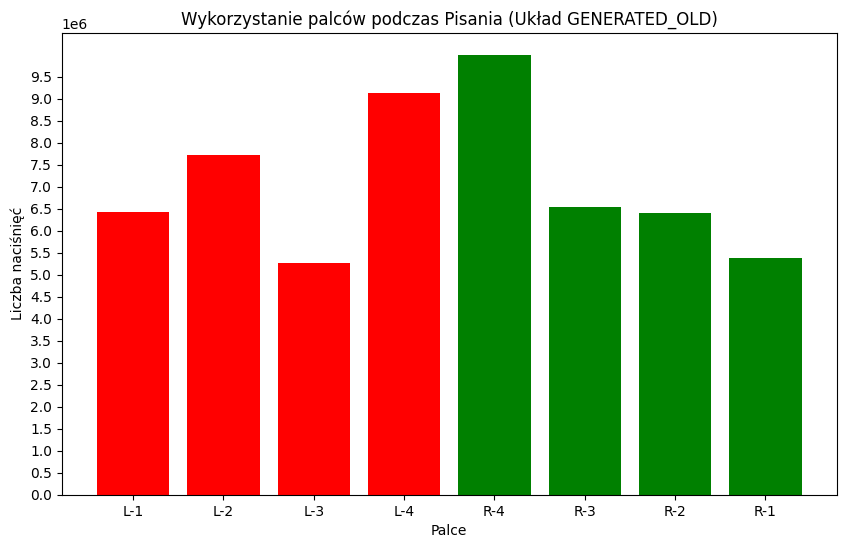

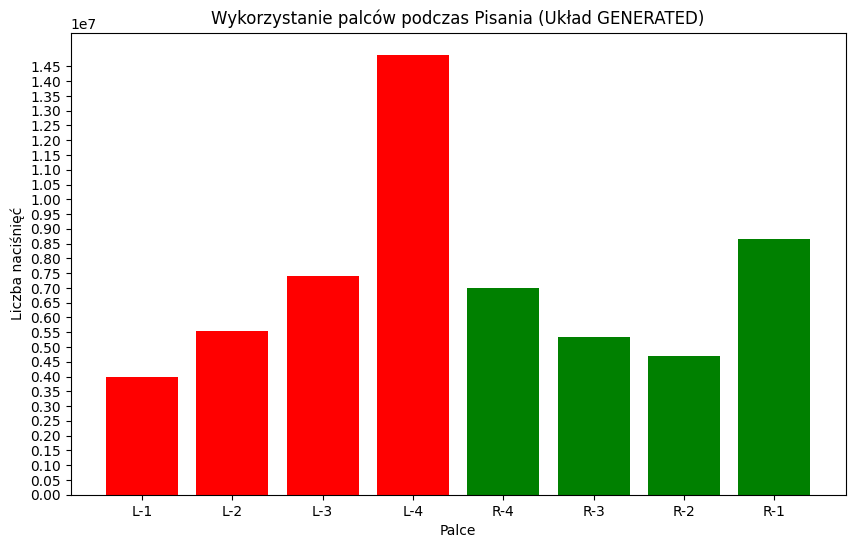

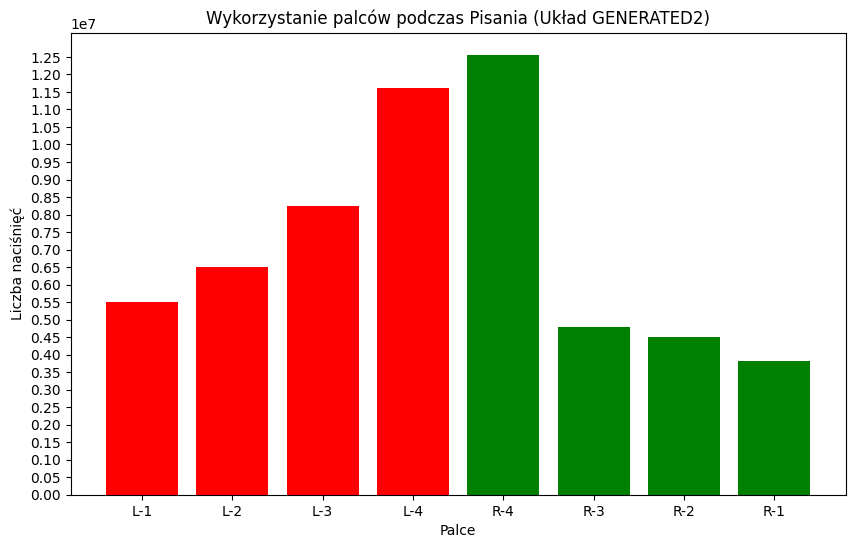

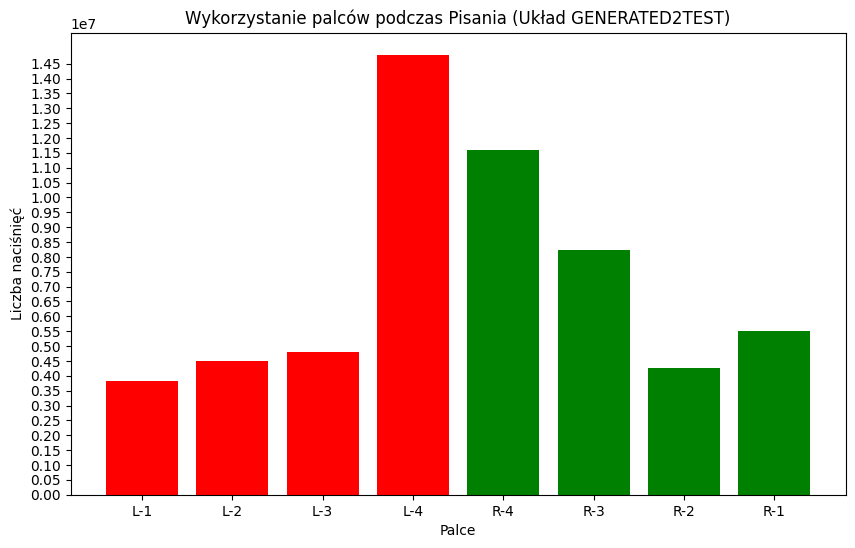

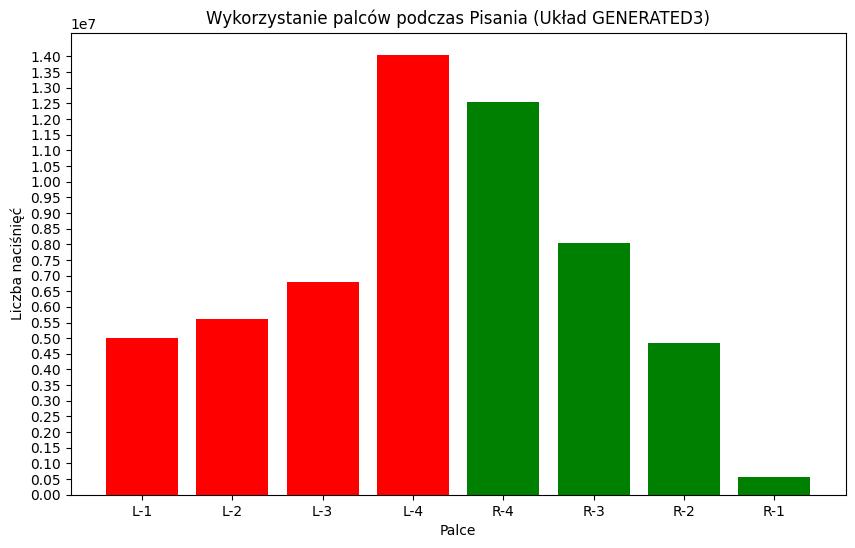

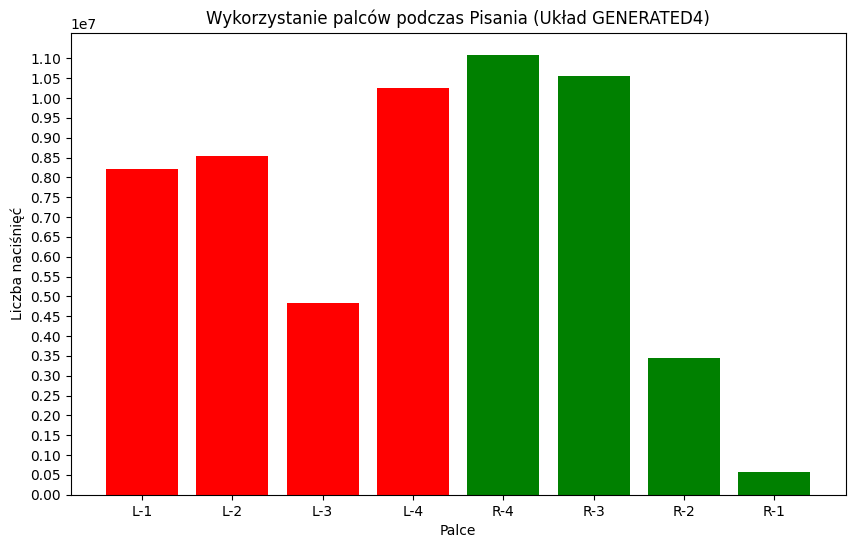

In [39]:
import matplotlib.pyplot as plt

GENERATED_old_layout = [
    'uak', 'ft,', 'gsx', 'pnw/dq',
    '.iymlj', 'ye;', 'crz', 'hob'
]

GENERATED_layout = ['pmw', 'brx', 'lng', 'vdtscf', 'qkuajz', ',o/', ';iy', '.eh' ]

GENERATED_layout2test = ['qij', '.u,', ';o/', 'cazhey', 'dlgvrm', 'ptf', 'ksx', 'wnb']

GENERATED_layout2 = ['wnb', 'csx', 'ptf', 'vrmdlg', 'heykaz', ';o/', '.u,', 'qij' ]

GENERATED_layout3 = ['vnw', 'bcm', 'lsp', 'xrdhtf', '/g;.eu', 'oay', ',ilk', 'jzq']

GENERATED_layout4 = [ 'nsf', 'wtc', 'pmg', 'vrbdlx', ',o.;ay', 'ieh', 'ku/', 'qjz']

def print_finger_usage_in_typing(layout, layout_name):

    # Inicjalizacja licznika użycia palców
    finger_names = ['L-1', 'L-2', 'L-3', 'L-4',
                    'R-4', 'R-3', 'R-2', 'R-1']

    finger_counts = dict(zip(finger_names, [0] * 8)) 
    # Przetwarzanie korpusu
    for word in corpus:
        for letter in word.lower():  # Normalizacja wielkości liter
            for i, row in enumerate(layout):
                if letter in row:
                    finger_counts[finger_names[i]] += 1
                    break

    
    # Wykres statystyk użycia palców
    left_colors = ['red'] * 4
    right_colors = ['green'] * 4

    # Wykres statystyk użycia palców
    plt.figure(figsize=(10, 6))
    plt.bar(finger_counts.keys(), finger_counts.values(), color=left_colors + right_colors)

    plt.yticks(range(0, max(finger_counts.values()), 500000))

    # Wprowadzenie odstępu między rękami
    plt.title(f'Wykorzystanie palców podczas Pisania (Układ {layout_name})')
    plt.xlabel('Palce')
    plt.ylabel('Liczba naciśnięć')
    plt.show() 

print_finger_usage_in_typing(GENERATED_old_layout, 'GENERATED_OLD')
print_finger_usage_in_typing(GENERATED_layout, 'GENERATED')
print_finger_usage_in_typing(GENERATED_layout2, 'GENERATED2')
print_finger_usage_in_typing(GENERATED_layout2test, 'GENERATED2TEST')
print_finger_usage_in_typing(GENERATED_layout3, 'GENERATED3')
print_finger_usage_in_typing(GENERATED_layout4, 'GENERATED4')


Calculating scores for QWERTY
Calculating scores for Dvorak
Calculating scores for Colemak
Calculating scores for Colemak DH
Calculating scores for Generated_OLD
Calculating scores for Generated
Calculating scores for Generated2
Calculating scores for Generated2test
Calculating scores for Generated3
Calculating scores for Generated4


C:\Users\dev422\OneDrive - DEVnet GmbH\Desktop\GIT\Magisterskie\Grafika\dataMining\venv\lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


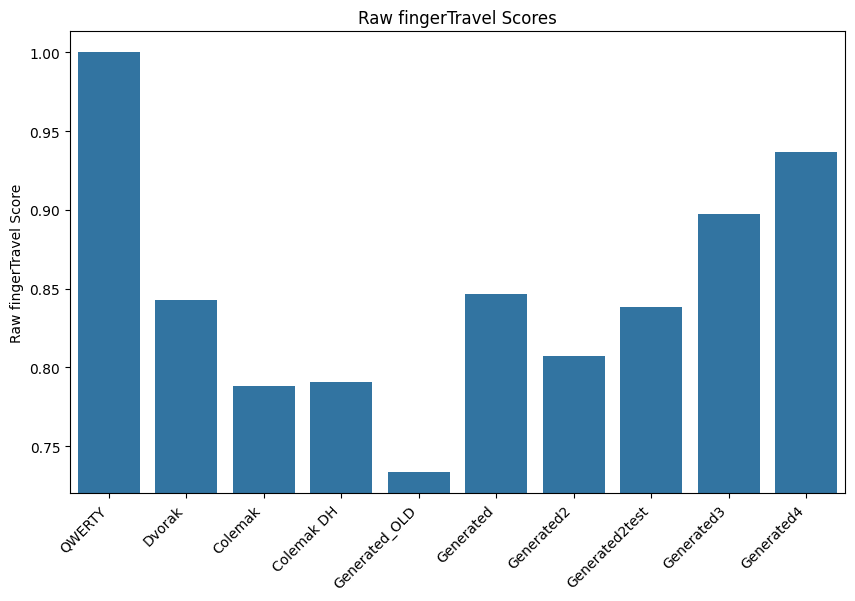

C:\Users\dev422\OneDrive - DEVnet GmbH\Desktop\GIT\Magisterskie\Grafika\dataMining\venv\lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


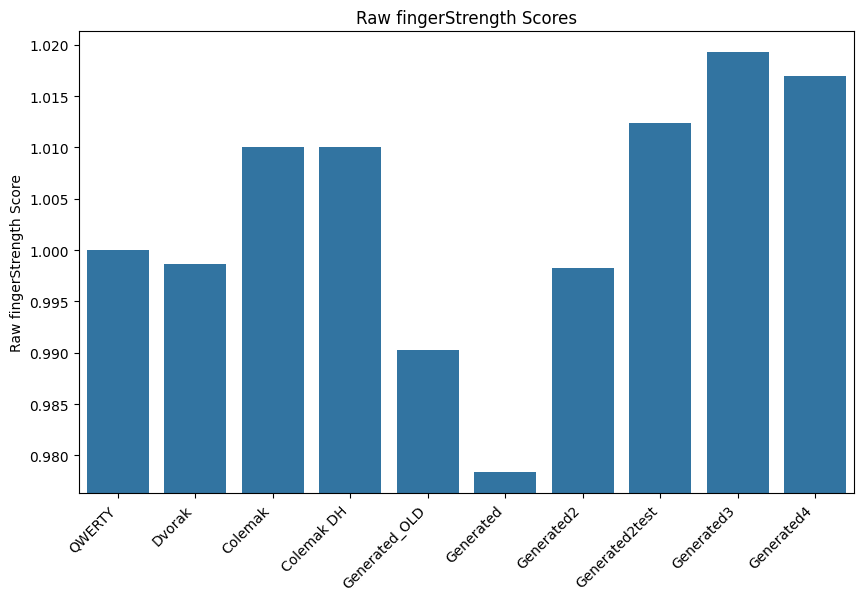

C:\Users\dev422\OneDrive - DEVnet GmbH\Desktop\GIT\Magisterskie\Grafika\dataMining\venv\lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


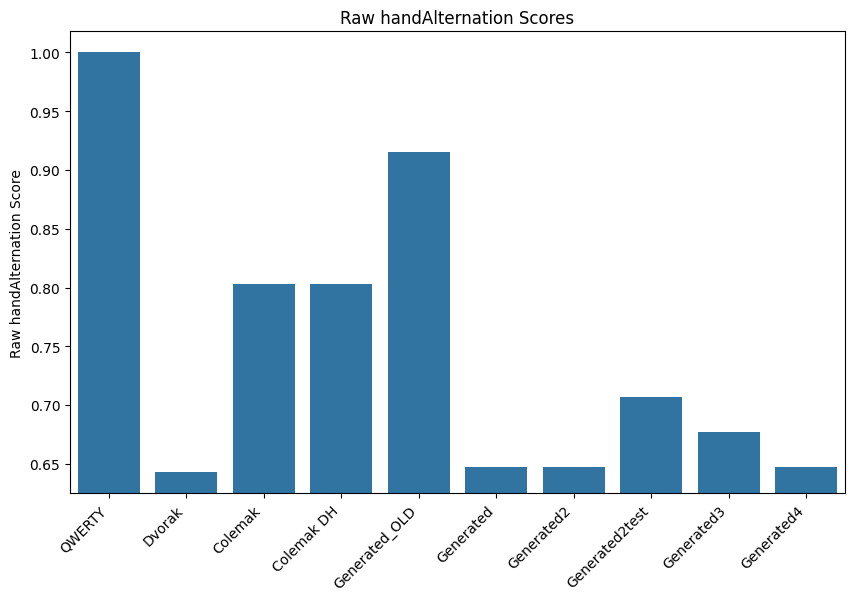

C:\Users\dev422\OneDrive - DEVnet GmbH\Desktop\GIT\Magisterskie\Grafika\dataMining\venv\lib\site-packages\seaborn\categorical.py:1281: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(aggregator, agg_var)


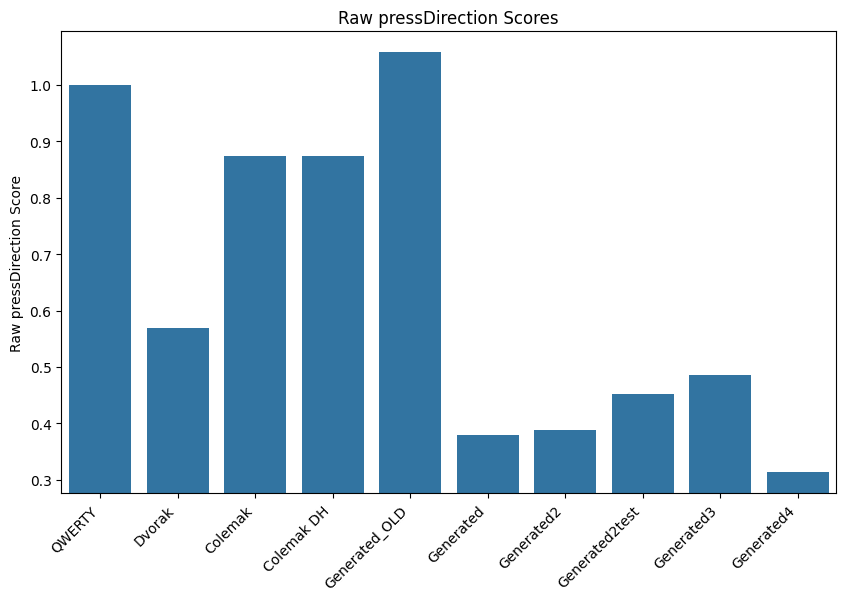

In [60]:
import logging
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter, defaultdict
import copy


# --- Existing Code (from your notebook) ---

# File loading, preprocessing and other functions from notebook

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


# Function to calculate finger usage
def print_finger_usage_in_typing(layout, layout_name, corpus):
    finger_names = ['L-1', 'L-2', 'L-3', 'L-4', 'R-4', 'R-3', 'R-2', 'R-1']
    finger_counts = dict(zip(finger_names, [0] * 8))
    for word in corpus:
        for letter in word.lower():
            for i, row in enumerate(layout):
                if letter in row:
                    finger_counts[finger_names[i]] += 1
                    break
    left_colors = ['red'] * 4
    right_colors = ['green'] * 4
    plt.figure(figsize=(10, 6))
    plt.bar(finger_counts.keys(), finger_counts.values(), color=left_colors + right_colors)
    plt.title(f'Wykorzystanie palców podczas Pisania (Układ {layout_name})')
    plt.xlabel('Palce')
    plt.ylabel('Liczba naciśnięć')
    plt.show()

# Function to calculate travel distance (same as in your C#)

def calculate_travel_distance(sentence, layout):
    top_indices =    [0, 3, 6, 9, 12, 15, 18, 21, 24, 27]
    middle_indices = [1, 4, 7, 10, 13, 16, 19, 22, 25, 28]
    bottom_indices = [2, 5, 8, 11, 14, 17, 20, 23, 26, 29]

    top_row = [ layout[i] for i in top_indices]
    middle_row = [ layout[i] for i in middle_indices]
    bottom_row = [ layout[i] for i in bottom_indices]

    costs = {
        'top_row': 1.032,
        'bottom_row': 1.118,
        'vertical': 2.138,
        f'{layout[10]}{layout[12]}': 1.247, f'{layout[12]}{layout[10]}': 1.247,
        f'{layout[16]}{layout[18]}': 1.247, f'{layout[18]}{layout[16]}': 1.247,
        f'{layout[9]}{layout[13]}': 1.605, f'{layout[13]}{layout[9]}': 1.605,
        f'{layout[15]}{layout[19]}': 1.605, f'{layout[19]}{layout[15]}': 1.605,
        f'{layout[10]}{layout[14]}': 1.803, f'{layout[14]}{layout[10]}': 1.803,
        f'{layout[16]}{layout[20]}': 1.803, f'{layout[20]}{layout[16]}': 1.803,
        f'{layout[9]}{layout[14]}': 2.661, f'{layout[14]}{layout[9]}': 2.661,
        f'{layout[15]}{layout[20]}': 2.661, f'{layout[20]}{layout[15]}' : 2.661,
        f'{layout[12]}{layout[11]}': 2.015, f'{layout[11]}{layout[12]}': 2.015,
        f'{layout[18]}{layout[17]}': 2.015, f'{layout[17]}{layout[18]}': 2.015,
        f'{layout[9]}{layout[12]}': 1, f'{layout[12]}{layout[9]}': 1,
        f'{layout[10]}{layout[13]}': 1, f'{layout[13]}{layout[10]}': 1,
        f'{layout[11]}{layout[14]}': 1, f'{layout[14]}{layout[11]}': 1,
        f'{layout[18]}{layout[15]}': 1, f'{layout[15]}{layout[18]}': 1,
        f'{layout[19]}{layout[16]}': 1, f'{layout[16]}{layout[19]}': 1,
        f'{layout[20]}{layout[17]}': 1, f'{layout[17]}{layout[20]}': 1
    }

    hands = {
       'left': {
           'pinky': f'{layout[0]}{layout[1]}{layout[2]}',
           'ring': f'{layout[3]}{layout[4]}{layout[5]}',
           'middle': f'{layout[6]}{layout[7]}{layout[8]}',
           'index': f'{layout[9]}{layout[10]}{layout[11]}{layout[12]}{layout[13]}{layout[14]}'
       },
       'right': {
           'index': f'{layout[18]}{layout[19]}{layout[20]}{layout[15]}{layout[16]}{layout[17]}',
           'middle': f'{layout[21]}{layout[22]}{layout[23]}',
           'ring': f'{layout[24]}{layout[25]}{layout[26]}',
           'pinky': f'{layout[27]}{layout[28]}{layout[29]}'
       }
    }
    
    total_distance = 0
    current_hands = {
        'left': {
            'pinky': f'{layout[1]}',
            'ring': f'{layout[4]}',
            'middle': f'{layout[7]}',
            'index': f'{layout[10]}'
        },
        'right': {
            'pinky': f'{layout[28]}',
            'ring': f'{layout[25]}',
            'middle': f'{layout[22]}',
            'index': f'{layout[19]}'
        }
    }

    starting_hand = {
        'left': {
            'pinky': f'{layout[1]}',
            'ring': f'{layout[4]}',
            'middle': f'{layout[7]}',
            'index': f'{layout[10]}'
        },
        'right': {
            'pinky': f'{layout[28]}',
            'ring': f'{layout[25]}',
            'middle': f'{layout[22]}',
            'index': f'{layout[19]}'
        }
    }
    
    for prev_char, char in zip(' ' + sentence, sentence):  # Add space for starting positions
        if char not in layout:
            continue
        
        if char == ' ' :
            current_hands = copy.deepcopy(starting_hand)
            continue
        
        char = char.lower()
        
        for hand, fingers in hands.items():
            for finger, column in fingers.items():
                if char in column:
                    current_finger = finger
                    current_hand_name = hand 
                    break 

        prev_held_char = current_hands[current_hand_name][current_finger]
        key_pair = prev_held_char + char
            
        if key_pair in costs:
            distance = costs[key_pair]
        elif prev_held_char == char: 
            distance = 0 
        elif prev_held_char in middle_row:
            if char in bottom_row:
                distance = costs['bottom_row']
            else:
                distance = costs['top_row']
        elif prev_held_char in top_row:
            if char in middle_row:
                distance = costs['top_row']
            else:
                distance = costs['vertical']
        elif prev_held_char in bottom_row:
            if char in middle_row:
                distance = costs['bottom_row']
            else:
                distance = costs['vertical']
        else:
            print('unexpected')

        total_distance += distance
            
        current_hands[current_hand_name][current_finger] = char
    return total_distance

# Function to calculate finger strength
fingerStrengths = {
    'left': {
        'pinky': 234.5,
        'ring': 230.1,
        'middle': 247.1,
        'index': 256.6
    },
    'right': {
        'index': 310.6,
        'middle': 293,
        'ring': 263,
        'pinky': 231
    }
}

def calculate_finger_strength(layout, corpus):
    key_frequencies = Counter()
    
    hands = {
       'left': {
           'pinky': f'{layout[0]}{layout[1]}{layout[2]}',
           'ring': f'{layout[3]}{layout[4]}{layout[5]}',
           'middle': f'{layout[6]}{layout[7]}{layout[8]}',
           'index': f'{layout[9]}{layout[10]}{layout[11]}{layout[12]}{layout[13]}{layout[14]}'
       },
       'right': {
           'index': f'{layout[18]}{layout[19]}{layout[20]}{layout[15]}{layout[16]}{layout[17]}',
           'middle': f'{layout[21]}{layout[22]}{layout[23]}',
           'ring': f'{layout[24]}{layout[25]}{layout[26]}',
           'pinky': f'{layout[27]}{layout[28]}{layout[29]}'
       }
    }
        
    for word in corpus:
      for char in word:
        key_frequencies[char.lower()] += 1
    
    effort_score = 0
    for char, frequency in key_frequencies.items():
            
            
      hand = None
      finger = None

      for hand_name, fingers in hands.items():
           for finger_name, column in fingers.items():
               if char in column:
                   hand = hand_name
                   finger = finger_name
                   break
           if hand is not None:
               break
                
      if hand is not None and finger is not None:
          effort_score += frequency / fingerStrengths[hand][finger]

    return effort_score


def calculate_hand_alternation(text, layout):
    alternation_score = 0
    previous_char = None
    
    hands = {
       'left': {
           'pinky': f'{layout[0]}{layout[1]}{layout[2]}',
           'ring': f'{layout[3]}{layout[4]}{layout[5]}',
           'middle': f'{layout[6]}{layout[7]}{layout[8]}',
           'index': f'{layout[9]}{layout[10]}{layout[11]}{layout[12]}{layout[13]}{layout[14]}'
       },
       'right': {
           'index': f'{layout[18]}{layout[19]}{layout[20]}{layout[15]}{layout[16]}{layout[17]}',
           'middle': f'{layout[21]}{layout[22]}{layout[23]}',
           'ring': f'{layout[24]}{layout[25]}{layout[26]}',
           'pinky': f'{layout[27]}{layout[28]}{layout[29]}'
       }
    }

    for char in text:
      if char == ' ':
        previous_char = None
        continue
      
      char = char.lower()

      current_hand = None
      for hand, fingers in hands.items():
            for finger, column in fingers.items():
                if char in column:
                  current_hand = hand
                  break
            if current_hand is not None:
                break

      if previous_char is not None:
            prev_hand = None
            for hand, fingers in hands.items():
                for finger, column in fingers.items():
                    if previous_char in column:
                      prev_hand = hand
                      break
                if prev_hand is not None:
                    break
                    
            if prev_hand == current_hand:
              alternation_score += 1


      previous_char = char
      
    return alternation_score

# Function to calculate hit direction
def calculate_hit_direction(text, layout):
    wrong_direction_score = 0
    previous_char = None
    
    hands = {
       'left': {
           'pinky': f'{layout[0]}{layout[1]}{layout[2]}',
           'ring': f'{layout[3]}{layout[4]}{layout[5]}',
           'middle': f'{layout[6]}{layout[7]}{layout[8]}',
           'index': f'{layout[9]}{layout[10]}{layout[11]}{layout[12]}{layout[13]}{layout[14]}'
       },
       'right': {
           'index': f'{layout[18]}{layout[19]}{layout[20]}{layout[15]}{layout[16]}{layout[17]}',
           'middle': f'{layout[21]}{layout[22]}{layout[23]}',
           'ring': f'{layout[24]}{layout[25]}{layout[26]}',
           'pinky': f'{layout[27]}{layout[28]}{layout[29]}'
       }
    }
    

    for char in text:
        if char == ' ':
            previous_char = None
            continue
        
        char = char.lower()

        current_hand = None
        current_finger = None
        for hand_name, fingers in hands.items():
            for finger_name, column in fingers.items():
                if char in column:
                  current_hand = hand_name
                  current_finger = finger_name
                  break
            if current_hand is not None:
                break

        if previous_char is not None:
            prev_hand = None
            prev_finger = None

            for hand_name, fingers in hands.items():
                for finger_name, column in fingers.items():
                    if previous_char in column:
                      prev_hand = hand_name
                      prev_finger = finger_name
                      break
                if prev_hand is not None:
                    break
            
            if prev_hand == current_hand and prev_finger != current_finger:

                prev_pos = layout.index(previous_char)
                current_pos = layout.index(char)

                if is_wrong_direction(current_hand, prev_pos, current_pos):
                    wrong_direction_score += 1
                    
        previous_char = char
    return wrong_direction_score

def is_wrong_direction(hand, prev_pos, current_pos):
    if hand == 'left':
        return prev_pos > current_pos
    else:
        return prev_pos < current_pos

def calculate_hand_metrics(text, layout):
    return calculate_hand_alternation(text, layout) , calculate_hit_direction(text, layout)


# --- Layout Definitions ---
qwerty_layout = list('qazwsxedcrfvtgbyhnujmik,ol.p;/')
dvorak_layout = list('/a;,oq.ejpukyixfdbghmctwrnvlsz')
colemak_layout = list('qazwrxfscptvgdbjhklnmue,yi.;o/')
colemak_dh_layout = list('qazwrxfscptdbgvjmklnhue,yi.;o/')
generated_layout_old = list('uakft,gsxpnw/dq.iymljye;crzhob');
generated_layout = list('pmwbrxlngvtcdsfqujkaz,o/;iy.eh')
generated_layout2 = list('wnbcsxptfvrmdlgqeykaz;o/.u,hij');
generated_layout2test = list('qij.u,;o/cazheydlgvrmptfksxwnb');
generated_layout3 = list('vnwbcmlspxrdhtf/g;.euoay.ikjzq')
generated_layour4 = list('nsfwtcpmgvrbdlx,o.;ayiehku/qjz')

layout_names = ['QWERTY', 'Dvorak', 'Colemak', 'Colemak DH', 'Generated_OLD', 'Generated', 'Generated2', 'Generated3']
layouts = {
    'QWERTY': qwerty_layout,
    'Dvorak': dvorak_layout,
    'Colemak': colemak_layout,
    'Colemak DH': colemak_dh_layout,
    'Generated_OLD': generated_layout_old,
    'Generated': generated_layout,
    'Generated2': generated_layout2,
    'Generated2test': generated_layout2test,
    'Generated3': generated_layout3,
    "Generated4": generated_layout4,
}


# --- Metric Calculation & Normalization ---

def calculate_all_layout_scores(corpus):
    layout_scores = {}
    
    for layout_name, layout in layouts.items():
        print(f"Calculating scores for {layout_name}")
        total_finger_travel = 0
        total_finger_strength = 0
        total_hand_alternation = 0
        total_press_direction = 0

        for text in corpus:
            total_finger_travel += calculate_travel_distance(text, layout)
            total_hand_alternation_score, total_press_direction_score = calculate_hand_metrics(text, layout)
            total_hand_alternation += total_hand_alternation_score
            total_press_direction += total_press_direction_score

        total_finger_strength = calculate_finger_strength(layout, corpus)

        layout_scores[layout_name] = {
          'fingerTravel': total_finger_travel,
            'fingerStrength': total_finger_strength,
            'handAlternation': total_hand_alternation,
            'pressDirection': total_press_direction
        }

    return layout_scores



def normalize_scores(scores, qwerty_scores):
    normalized_scores = {}
    for layout_name, layout_data in scores.items():
      normalized_scores[layout_name] = {}
      for key in layout_data:
        normalized_scores[layout_name][key] = layout_data[key] / qwerty_scores[key]
    return normalized_scores

def apply_weights(normalized_scores):
    weighted_scores = {}
    finger_travel_weight = 0.7
    finger_strength_weight = 0.5
    hand_alternation_weight = 1.0
    press_direction_weight = 0.6

    for layout_name, normalized_layout_data in normalized_scores.items():
        weighted_scores[layout_name] = (
              normalized_layout_data['fingerTravel'] * finger_travel_weight
            + normalized_layout_data['fingerStrength'] * finger_strength_weight
            + normalized_layout_data['handAlternation'] * hand_alternation_weight
            + normalized_layout_data['pressDirection'] * press_direction_weight
        )
    return weighted_scores

def plot_scores(scores, title, ylabel):
    
    names = list(scores.keys())
    values = list(scores.values())
    
    plt.figure(figsize=(10,6))
    sns.barplot(x=names, y=values)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')

    min_score = min(values)
    max_score = max(values)

    plt.ylim(min_score - (max_score - min_score) * 0.05, max_score + (max_score - min_score) * 0.05)

    plt.show()
# --- Main Execution ---
num_files_to_use = 10
limited_file_paths = file_paths[:num_files_to_use]


preprocessed_files = [' '.join(preprocess_text(open(file_path, 'r', errors='ignore').read())) for file_path in limited_file_paths]
corpus = [text for text in preprocessed_files]

layout_scores = calculate_all_layout_scores(corpus)
normalized_layout_scores = normalize_scores(layout_scores, layout_scores['QWERTY']) # skipping normalization


# Plot each metric separately
for metric in ['fingerTravel', 'fingerStrength', 'handAlternation', 'pressDirection']:
    metric_scores = {name: data[metric] for name, data in normalized_layout_scores.items()} # using raw scores
    plot_scores(metric_scores, f'Raw {metric} Scores', f'Raw {metric} Score')